# CLASSIFICANDO DADOS DE DIABETES COM MODELOS DE CLASSIFICAÇÃO

**SOBRE OS DADOS**

O dataset em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database) e possui as seguintes variáveis:


**1)** PregnanciesNumber : Número de vezes que esteve grávida;

**2)** GlucosePlasma : Concentração de glicose a 2 horas em um teste oral de tolerância à glicose;

**3)** BloodPressureDiastolic : pressão sanguínea (mm Hg)

**4)** SkinThicknessTriceps : Espessura da dobra cutânea (mm)

**5)** Insulin : Insulina sérica de 2 horas (mu U/ml)

**6)** BMI : Índice de massa corporal (IMC)

**7)** DiabetesPedigreeFunction : Função pedigree do diabetes

**8)** Age : Idade (em anos)

**9)** OutcomeClass : Variável de resultado (0 ou 1) 268 de 768 são 1, os outros resultados são 0.

Se for diabético o resultado será 1 e caso não seja, o resultado é zero.


**METODOLOGIA**

Os modelos usados para classificação de dados serão a regressão logística, Support Vector Machine (SVM), Cat Boost e de Árvore Aleatória (Random Forest). A regressão logística faz parte da classe de regressão de respostas dicotômicas, ou seja, binárias; onde o resultado é ''0'' (geralmente associado a fracasso, não curado, derrota, etc.) ou ''1'' (geralmente associado a sucesso, curado, vitória, etc.). No trabalho em questão classificaremos a partir das features, se o indivíduo é portador (1) ou não (0) de diabetes. Já os modelos SVM, Cat Boost e Random Forest fazem parte de uma classe de algoritmos de classificação supervisionados e não necessariamente classificam, apenas, repostas binárias.

**IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm

**IMPORTANDO OS DADOS**

In [2]:
diabetes=pd.read_csv('diabetes.csv')

**VISUALIZANDO O CONJUNTO DE DADOS**

Abaixo tem o dataset e suas colunas e por padrão o comando head() mostra as 5 primeiras linhas.

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**VISUALIZANDO OS TIPOS DE DADOS DO DATASET**

O dataset tem 768 linhas e nenhuma é nula (ou seja não possui missing values).

In [4]:
#Informações sobre as colunas

#Apenas duas colunas são do tipo float

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**ESTATÍSTICAS DESCRITIVAS DO DATASET**

Podemos ver na tabela abaixo o número de observações, a média, o desvio padrão e outras medidas calculadas provenientes do dataset.

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos também transpor essa tabela.

In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Separando dados de treino e teste

Vamos separar os dados no começo e a medida que fomos tratando cada coluna, iremos acompanhar ao final de cada tratamento como os dataset vão se modificando

In [7]:
#Importando o módulo

from sklearn.model_selection import train_test_split

In [8]:
#seeparando as colunas de features e de classe

features = diabetes.drop(['Outcome'],axis=1,inplace=False)
classe=diabetes['Outcome']

In [9]:
#separando os dados de treino e teste

X_treino,X_teste,y_treino,y_teste=train_test_split(features,classe,random_state=42)

In [10]:
#verificando os shapes de cada dataset

X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((576, 8), (192, 8), (576,), (192,))

In [11]:
#definindo uma lista com o nome das bases de treino e teste

bases=[X_treino,X_teste]

# Análise e tratamento da coluna Pregnancies

Abaixo vamos observar alguns gráfico e ver se é possível extrair informações da relação entre variáveis

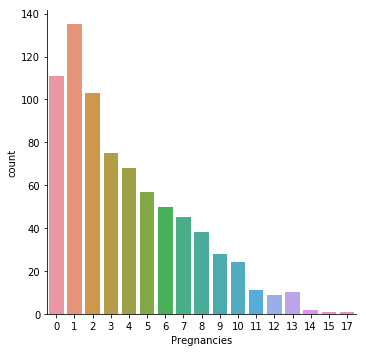

In [12]:
#Observando o número de mulheres por número de vezes que ficou grávida

sns.catplot(x="Pregnancies", kind="count", data=diabetes)

In [13]:
diabetes[['Pregnancies','Outcome']].groupby(['Pregnancies'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#A tabela abaixo mostra a taxa de mulheres grávidas por diabetes

#Aparentemente, quantos mais filhos uma mulher tem, maior a chance dela ter diabetes.

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


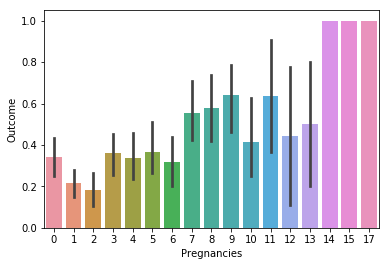

In [14]:
sns.barplot(x="Pregnancies", y="Outcome", data=diabetes)

#O gráfico abaixo mostra o mesmo resultado da tabela acima

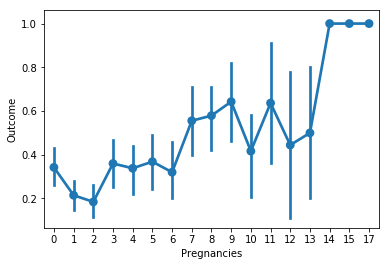

In [15]:
sns.pointplot(x="Pregnancies", y="Outcome", data=diabetes)

#Visualizando em um gráfico de linhas

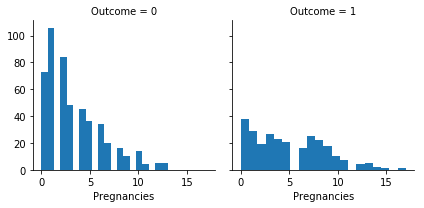

In [16]:
g = sns.FacetGrid(diabetes, col='Outcome')
g.map(plt.hist, 'Pregnancies',bins=20)

#No gráfico abaixo gerado pelo FaceGrid, separamos os resultados 0 e 1

#As não-ocorrências de diabetes foram bem maiores em mulheres que não tiverem filhos

In [17]:
#Vamos fazer um breve tratamento na coluna Pregnancies e criando intervalos de valores

diabetes['Faixa_Pregnancies']=pd.qcut(diabetes['Pregnancies'], 4)
diabetes['Faixa_Pregnancies']

0         (3.0, 6.0]
1      (-0.001, 1.0]
2        (6.0, 17.0]
3      (-0.001, 1.0]
4      (-0.001, 1.0]
           ...      
763      (6.0, 17.0]
764       (1.0, 3.0]
765       (3.0, 6.0]
766    (-0.001, 1.0]
767    (-0.001, 1.0]
Name: Faixa_Pregnancies, Length: 768, dtype: category
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 6.0] < (6.0, 17.0]]

In [18]:
diabetes['Faixa_Pregnancies'].value_counts(ascending=False)

#Aqui podemos visualizar melhor por faixa

(-0.001, 1.0]    246
(1.0, 3.0]       178
(3.0, 6.0]       175
(6.0, 17.0]      169
Name: Faixa_Pregnancies, dtype: int64

In [19]:
diabetes[['Faixa_Pregnancies','Outcome']].groupby(['Faixa_Pregnancies'],
                                                  as_index=False).mean().sort_values(by='Outcome',ascending=False)

#Na tabela abaixo podemos ver a taxa de ocorrência de diabetes e coincide com o que observamos anteriormente
#A medida que uma mulher tem mais filhos, a chance de adquirir diabetes é maior.

,Faixa_Pregnancies,Outcome
3,"(6.0, 17.0]",0.562130
2,"(3.0, 6.0]",0.342857
0,"(-0.001, 1.0]",0.272358
1,"(1.0, 3.0]",0.258427


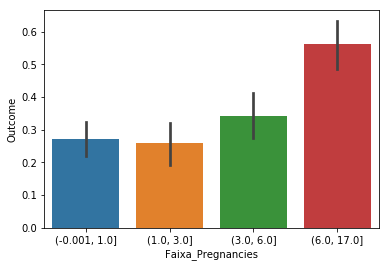

In [20]:
sns.barplot(x="Faixa_Pregnancies", y="Outcome", data=diabetes)

#Visualizando graficamente

In [21]:
#definindo os valores para o respectivo valor

for i in bases:    
    i.loc[ i['Pregnancies'] <= 1, 'Pregnancies'] = 0
    i.loc[(i['Pregnancies'] > 1) & (i['Pregnancies'] <= 3), 'Pregnancies'] = 1
    i.loc[(i['Pregnancies'] > 3) & (i['Pregnancies'] <= 6), 'Pregnancies'] = 2
    i.loc[i['Pregnancies'] > 6,'Pregnancies'] = 3

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
#visualizando os datasets, vemos que a coluna Pregnancies foi alterada

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,129,0,30,0,39.9,0.569,44
73,2,129,86,20,270,35.1,0.231,23
352,1,61,82,28,0,34.4,0.243,46
497,1,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,98,58,33,190,34.0,0.430,43
324,1,112,75,32,0,35.7,0.148,21
624,1,108,64,0,0,30.8,0.158,21
690,3,107,80,0,0,24.6,0.856,34
473,3,136,90,0,0,29.9,0.210,50


In [23]:
#Número de ocorrências por cada classe de Pregnancies

display(X_treino['Pregnancies'].value_counts(ascending=False))
display(X_teste['Pregnancies'].value_counts(ascending=False))

0    194
2    132
1    130
3    120
Name: Pregnancies, dtype: int64

0    52
3    49
1    48
2    43
Name: Pregnancies, dtype: int64

# Análise e tratamento a coluna Age

In [24]:
#Na coluna Age não há dados faltantes

diabetes['Age'].isna().sum()

0

In [25]:
#Também é bom conferir se há alguém com idade zerada, o que acaba não sendo computado no isna().sum()

diabetes['Age'].value_counts(ascending=False)

#Como podemos ver, não há idades com valores zero

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

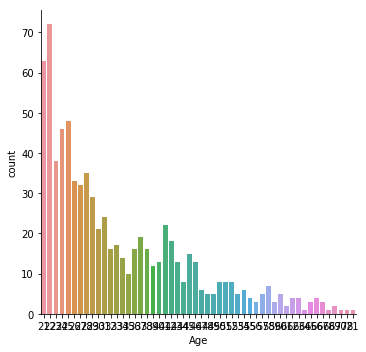

In [26]:
sns.catplot(x="Age", kind="count", data=diabetes)

#Visualizando o resultado acima graficamente

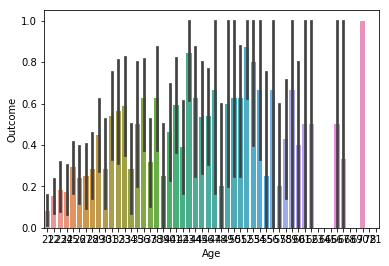

In [27]:
sns.barplot(x="Age",y="Outcome", data=diabetes)

#O gráfico abaixo mostra

In [28]:
#Criando as faixas

diabetes['Faixa_Age']=pd.qcut(diabetes['Age'], 4)
diabetes['Faixa_Age']

0        (41.0, 81.0]
1        (29.0, 41.0]
2        (29.0, 41.0]
3      (20.999, 24.0]
4        (29.0, 41.0]
            ...      
763      (41.0, 81.0]
764      (24.0, 29.0]
765      (29.0, 41.0]
766      (41.0, 81.0]
767    (20.999, 24.0]
Name: Faixa_Age, Length: 768, dtype: category
Categories (4, interval[float64]): [(20.999, 24.0] < (24.0, 29.0] < (29.0, 41.0] < (41.0, 81.0]]

In [29]:
diabetes['Faixa_Age'].value_counts(ascending=False)

#Para idade, a maioria das mulheres se encontram com idade entre 21 e 36 anos

(20.999, 24.0]    219
(29.0, 41.0]      200
(24.0, 29.0]      177
(41.0, 81.0]      172
Name: Faixa_Age, dtype: int64

In [30]:
diabetes[['Faixa_Age','Outcome']].groupby(['Faixa_Age'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#Curioso dos dados de idade, que a taxa de ocorrência de diabetes é maior nas faixas intermediárias

,Faixa_Age,Outcome
3,"(41.0, 81.0]",0.517442
2,"(29.0, 41.0]",0.475000
1,"(24.0, 29.0]",0.299435
0,"(20.999, 24.0]",0.141553


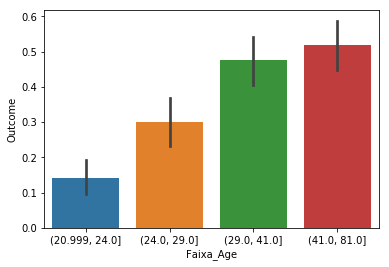

In [31]:
sns.barplot(x="Faixa_Age", y="Outcome", data=diabetes)

#Visualizando o resultado anterior graficamente

In [32]:
#Vamos fazer a mesma coisa que fizemos com a coluna Pregnancies

for i in bases:    
    i.loc[ i['Age'] <= 24, 'Age'] = 0
    i.loc[(i['Age'] >24) & (i['Age'] <= 29), 'Age'] = 1
    i.loc[(i['Age'] > 29) & (i['Age'] <= 41), 'Age'] = 2
    i.loc[i['Age'] > 41,'Age'] = 3

In [33]:
#ocorrências por classe

display(X_treino['Age'].value_counts(ascending=False))
display(X_teste['Age'].value_counts(ascending=False))

0    166
2    153
1    133
3    124
Name: Age, dtype: int64

0    53
3    48
2    47
1    44
Name: Age, dtype: int64

In [34]:
#Podemos observar que a coluna Age também foi alterada

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,129,0,30,0,39.9,0.569,3
73,2,129,86,20,270,35.1,0.231,0
352,1,61,82,28,0,34.4,0.243,3
497,1,81,72,15,76,30.1,0.547,1
145,0,102,75,23,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,98,58,33,190,34.0,0.430,3
324,1,112,75,32,0,35.7,0.148,0
624,1,108,64,0,0,30.8,0.158,0
690,3,107,80,0,0,24.6,0.856,2
473,3,136,90,0,0,29.9,0.210,3


# Análise e tratamento da coluna Glucose

In [35]:
#Não valores faltantes

diabetes['Glucose'].isna().sum()

0

In [36]:
#Nem há valores zerados

diabetes['Glucose'].value_counts(ascending=False)

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

In [38]:
#definindo as faixas da coluna Glucose

diabetes['Faixa_Glucose']=pd.qcut(diabetes['Glucose'], 4)
diabetes['Faixa_Glucose']

0      (140.25, 199.0]
1       (-0.001, 99.0]
2      (140.25, 199.0]
3       (-0.001, 99.0]
4      (117.0, 140.25]
            ...       
763      (99.0, 117.0]
764    (117.0, 140.25]
765    (117.0, 140.25]
766    (117.0, 140.25]
767     (-0.001, 99.0]
Name: Faixa_Glucose, Length: 768, dtype: category
Categories (4, interval[float64]): [(-0.001, 99.0] < (99.0, 117.0] < (117.0, 140.25] < (140.25, 199.0]]

In [39]:
#Ocorrências por faixas

diabetes['Faixa_Glucose'].value_counts(ascending=False)

(-0.001, 99.0]     197
(99.0, 117.0]      194
(140.25, 199.0]    192
(117.0, 140.25]    185
Name: Faixa_Glucose, dtype: int64

In [40]:
diabetes[['Faixa_Glucose','Outcome']].groupby(['Faixa_Glucose'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#Aqui podemos ver que quem possui glicose muito alta tem altas chances de adquirir diabetes, o que é algo óbvio.

,Faixa_Glucose,Outcome
3,"(140.25, 199.0]",0.687500
2,"(117.0, 140.25]",0.389189
1,"(99.0, 117.0]",0.247423
0,"(-0.001, 99.0]",0.081218


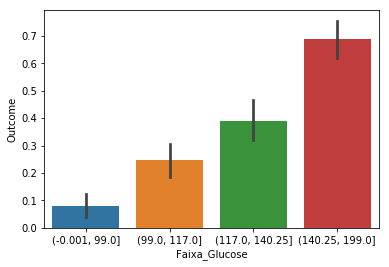

In [41]:
#resultado anterior em forma de gráfico

sns.barplot(x="Faixa_Glucose", y="Outcome", data=diabetes)

In [42]:
#definindo as bandas

for i in bases:    
    i.loc[ i['Glucose'] <= 99, 'Glucose'] = 0
    i.loc[(i['Glucose'] >99) & (i['Glucose'] <= 117), 'Glucose'] = 1
    i.loc[(i['Glucose'] >117) & (i['Glucose'] <= 140.25), 'Glucose'] = 2
    i.loc[i['Glucose'] > 140.25,'Glucose'] = 3

In [43]:
#Ocorrências por faixas

display(X_treino['Glucose'].value_counts(ascending=False))
display(X_teste['Glucose'].value_counts(ascending=False))

2    147
1    146
0    146
3    137
Name: Glucose, dtype: int64

3    55
0    51
1    48
2    38
Name: Glucose, dtype: int64

In [44]:
#dataset de treino e teste

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,2,0,30,0,39.9,0.569,3
73,2,2,86,20,270,35.1,0.231,0
352,1,0,82,28,0,34.4,0.243,3
497,1,0,72,15,76,30.1,0.547,1
145,0,1,75,23,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,0,58,33,190,34.0,0.430,3
324,1,1,75,32,0,35.7,0.148,0
624,1,1,64,0,0,30.8,0.158,0
690,3,1,80,0,0,24.6,0.856,2
473,3,2,90,0,0,29.9,0.210,3


# Análise e tratamento da coluna BloodPressure

In [45]:
#Não há missing values

diabetes['BloodPressure'].isna().sum()

0

In [46]:
diabetes['BloodPressure'].value_counts(ascending=True)

#Como podemos ver abaxio, há 35 observações com valores iguais a zero, o que não faz sentido algum

#Teremos que pegar esse valores e substituir ou pela média, ou pela mediana ou pela moda ou atribuir uma constante.

122     1
114     1
102     1
61      1
95      1
24      1
38      1
40      1
46      2
55      2
30      2
104     2
108     2
106     3
98      3
100     3
110     3
96      4
44      4
48      5
85      6
94      6
65      7
75      8
92      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
0      35
60     37
76     39
80     40
64     43
72     44
78     45
68     45
74     52
70     57
Name: BloodPressure, dtype: int64

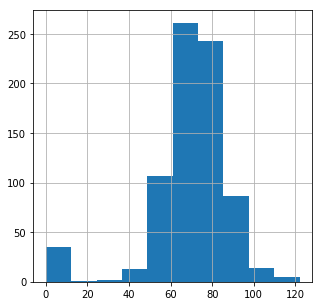

In [47]:
diabetes['BloodPressure'].hist(figsize=(5,5))

#Observando o gráfico, os dados parecem se comportar como uma distribuição normal

In [48]:
(diabetes['BloodPressure'].median(), diabetes['BloodPressure'].mean(),
 diabetes['BloodPressure'].median() - diabetes['BloodPressure'].mean())

#A diferença entre a média e mediana parecem ser pequenas

#então substuiremos os valores ausentes pela mediana

(72.0, 69.10546875, 2.89453125)

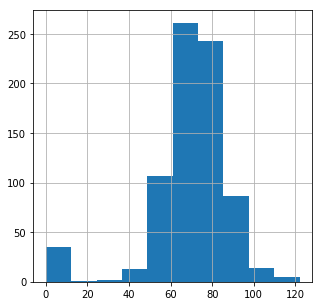

In [49]:
diabetes['BloodPressure'].hist(figsize=(5,5))

#Agora a distribuição parece mais com uma normal

In [50]:
#Imputando valores ausente com a mediana

dia_mean=diabetes['BloodPressure'].median()
diabetes['BloodPressure'].replace(0,dia_mean, inplace=True)

In [51]:
#Valores zerados substituídos pela mediana

diabetes['BloodPressure'].value_counts(ascending=True)

24      1
102     1
95      1
114     1
61      1
122     1
38      1
40      1
104     2
55      2
46      2
30      2
108     2
100     3
98      3
106     3
110     3
96      4
44      4
48      5
94      6
85      6
65      7
92      8
75      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
60     37
76     39
80     40
64     43
78     45
68     45
74     52
70     57
72     79
Name: BloodPressure, dtype: int64

In [52]:
#criando os intervalos para a coluna Pressão Sanguínea

diabetes['Faixa_Blood']=pd.qcut(diabetes['BloodPressure'], 4)
diabetes['Faixa_Blood']

0        (64.0, 72.0]
1        (64.0, 72.0]
2      (23.999, 64.0]
3        (64.0, 72.0]
4      (23.999, 64.0]
            ...      
763      (72.0, 80.0]
764      (64.0, 72.0]
765      (64.0, 72.0]
766    (23.999, 64.0]
767      (64.0, 72.0]
Name: Faixa_Blood, Length: 768, dtype: category
Categories (4, interval[float64]): [(23.999, 64.0] < (64.0, 72.0] < (72.0, 80.0] < (80.0, 122.0]]

In [53]:
diabetes['Faixa_Blood'].value_counts(ascending=False)

#A maioria das mulheres possui a pressã sanguínea entre 56 a 89 mm Hg

(64.0, 72.0]      218
(23.999, 64.0]    201
(72.0, 80.0]      184
(80.0, 122.0]     165
Name: Faixa_Blood, dtype: int64

In [54]:
diabetes[['Faixa_Blood','Outcome']].groupby(['Faixa_Blood'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#E podemos notar que a medida que a pressão sanguínea aumenta, aumenta a chance de ter diabetes

,Faixa_Blood,Outcome
3,"(80.0, 122.0]",0.466667
1,"(64.0, 72.0]",0.362385
2,"(72.0, 80.0]",0.358696
0,"(23.999, 64.0]",0.228856


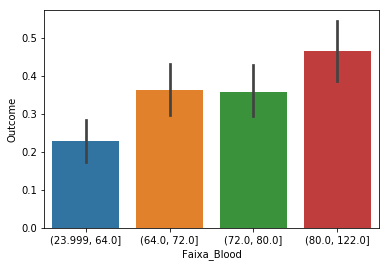

In [55]:
sns.barplot(x="Faixa_Blood", y="Outcome", data=diabetes)

In [56]:
#Atribuindo categorias para os intervalos

for i in bases:    
    i.loc[ i['BloodPressure'] <= 64, 'BloodPressure'] = 0
    i.loc[(i['BloodPressure'] >64) & (i['BloodPressure'] <= 72), 'BloodPressure'] = 1
    i.loc[(i['BloodPressure'] >72) & (i['BloodPressure'] <= 80), 'BloodPressure'] = 2
    i.loc[i['BloodPressure'] > 80,'BloodPressure'] = 3

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
#datasets de treino e teste

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,2,0,30,0,39.9,0.569,3
73,2,2,3,20,270,35.1,0.231,0
352,1,0,3,28,0,34.4,0.243,3
497,1,0,1,15,76,30.1,0.547,1
145,0,1,2,23,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,0,0,33,190,34.0,0.430,3
324,1,1,2,32,0,35.7,0.148,0
624,1,1,0,0,0,30.8,0.158,0
690,3,1,2,0,0,24.6,0.856,2
473,3,2,3,0,0,29.9,0.210,3


# Análise tratamento da coluna SkinThickness

In [58]:
#Não há missing values na coluna SkinThickness

diabetes['SkinThickness'].isna().sum()

0

In [59]:
#Porém há 227 valores zerados

diabetes['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

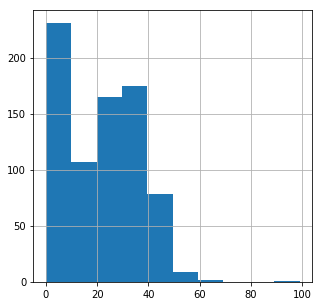

In [60]:
diabetes['SkinThickness'].hist(figsize=(5,5))

#Distribuição da coluna SkinThickness

In [61]:
(diabetes['SkinThickness'].median(), diabetes['SkinThickness'].mean(),diabetes['SkinThickness'].mode(),
 diabetes['SkinThickness'].median() - diabetes['SkinThickness'].mean())

#Vemos que diferença entre média e mediana é pequeno

#A moda é 0, o que não faz sentido. Vamos substituir esses valores pela mediana

(23.0, 20.536458333333332, 0    0
 dtype: int64, 2.463541666666668)

In [62]:
#Imputando os valores zero

diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median(),inplace=True)

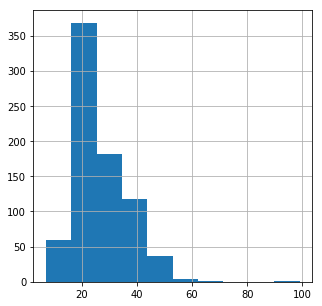

In [63]:
diabetes['SkinThickness'].hist(figsize=(5,5))

#Nova distribuição da coluna SkinThickness

In [64]:
#criando as faixas de SkinThickness

diabetes['Faixa_Skin']=pd.cut(diabetes['SkinThickness'], 4)
diabetes['Faixa_Skin']

0       (30.0, 53.0]
1      (6.908, 30.0]
2      (6.908, 30.0]
3      (6.908, 30.0]
4       (30.0, 53.0]
           ...      
763     (30.0, 53.0]
764    (6.908, 30.0]
765    (6.908, 30.0]
766    (6.908, 30.0]
767     (30.0, 53.0]
Name: Faixa_Skin, Length: 768, dtype: category
Categories (4, interval[float64]): [(6.908, 30.0] < (30.0, 53.0] < (53.0, 76.0] < (76.0, 99.0]]

In [65]:
#Ocorrências por faixas

diabetes['Faixa_Skin'].value_counts(ascending=False)

(6.908, 30.0]    530
(30.0, 53.0]     232
(53.0, 76.0]       5
(76.0, 99.0]       1
Name: Faixa_Skin, dtype: int64

In [66]:
#taxa de diabetes por faixas

diabetes[['Faixa_Skin','Outcome']].groupby(['Faixa_Skin'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Faixa_Skin,Outcome
3,"(76.0, 99.0]",1.000000
1,"(30.0, 53.0]",0.452586
2,"(53.0, 76.0]",0.400000
0,"(6.908, 30.0]",0.301887


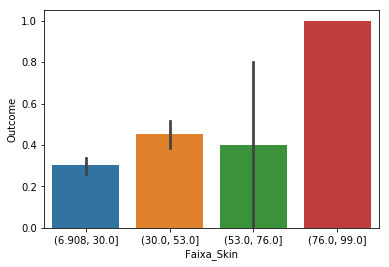

In [67]:
#resultado anterior graficamente

sns.barplot(x="Faixa_Skin", y="Outcome", data=diabetes)

In [68]:
#Atribuindo números as faixas

for i in bases:    
    i.loc[ i['SkinThickness'] <= 30, 'SkinThickness'] = 0
    i.loc[(i['SkinThickness'] >30) & (i['SkinThickness'] <= 53), 'SkinThickness'] = 1
    i.loc[(i['SkinThickness'] >53) & (i['SkinThickness'] <= 76), 'SkinThickness'] = 1
    i.loc[i['SkinThickness'] > 76,'SkinThickness'] = 1

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [69]:
#dataset de treino e teste

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,2,0,0,0,39.9,0.569,3
73,2,2,3,0,270,35.1,0.231,0
352,1,0,3,0,0,34.4,0.243,3
497,1,0,1,0,76,30.1,0.547,1
145,0,1,2,0,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,0,0,1,190,34.0,0.430,3
324,1,1,2,1,0,35.7,0.148,0
624,1,1,0,0,0,30.8,0.158,0
690,3,1,2,0,0,24.6,0.856,2
473,3,2,3,0,0,29.9,0.210,3


# Análise tratamento da coluna Insulin

In [70]:
#Não há valores missing para essa coluna

diabetes['Insulin'].isna().sum()

0

In [71]:
diabetes['Insulin'].value_counts()

# mas existem 374 valores iguais a zero

#Precisaremos tratar esses valores

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

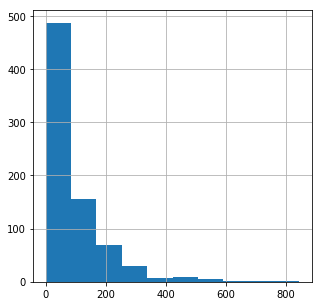

In [72]:
#Distribuição da coluna Insulin

diabetes['Insulin'].hist(figsize=(5,5))

In [73]:
#A diferença entre a mediana e a média da coluna é significativa

(diabetes['Insulin'].median(), diabetes['Insulin'].mean(),diabetes['Insulin'].mode(),
 diabetes['Insulin'].median() - diabetes['Insulin'].mean())

(30.5, 79.79947916666667, 0    0
 dtype: int64, -49.29947916666667)

In [74]:
#Optamos por substituir pela mediana da coluna

diabetes['Insulin'].replace(0,diabetes['Insulin'].median(),inplace=True)

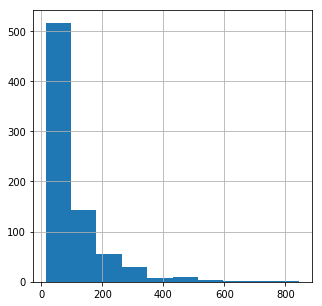

In [75]:
#Nova distribuição.

#vemos que não há valores zerados e que a distribuição da coluna, praticamente, não se alterou

diabetes['Insulin'].hist(figsize=(5,5))

In [76]:
#criando as faixas para a coluna Insulin

diabetes['Faixa_Insul']=pd.qcut(diabetes['Insulin'], 3)
diabetes['Faixa_Insul']

0       (13.999, 30.5]
1       (13.999, 30.5]
2       (13.999, 30.5]
3       (30.5, 94.333]
4      (94.333, 846.0]
            ...       
763    (94.333, 846.0]
764     (13.999, 30.5]
765    (94.333, 846.0]
766     (13.999, 30.5]
767     (13.999, 30.5]
Name: Faixa_Insul, Length: 768, dtype: category
Categories (3, interval[float64]): [(13.999, 30.5] < (30.5, 94.333] < (94.333, 846.0]]

In [77]:
#Contagem por classe

diabetes['Faixa_Insul'].value_counts(ascending=False)

(13.999, 30.5]     384
(94.333, 846.0]    256
(30.5, 94.333]     128
Name: Faixa_Insul, dtype: int64

In [78]:
#taxa de ocorrência de diabetes por classe da coluna Insulin

diabetes[['Faixa_Insul','Outcome']].groupby(['Faixa_Insul'],as_index=False).mean().sort_values(by='Outcome',ascending=False)


,Faixa_Insul,Outcome
2,"(94.333, 846.0]",0.453125
0,"(13.999, 30.5]",0.364583
1,"(30.5, 94.333]",0.093750


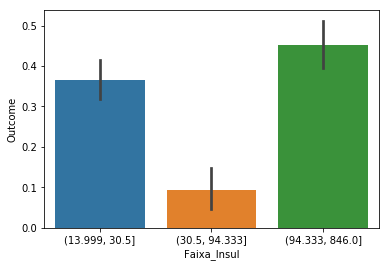

In [79]:
#Resultado anterior em gráfico

sns.barplot(x="Faixa_Insul", y="Outcome", data=diabetes)

In [80]:
#definindo os valores das faixas

for i in bases:    
    i.loc[ i['Insulin'] <= 30.5, 'Insulin'] = 0
    i.loc[(i['Insulin'] >30.5) & (i['Insulin'] <= 94.333), 'Insulin'] = 1
    i.loc[i['Insulin'] >94.333,'Insulin'] = 2

C:\Users\junio\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [81]:
#datasets de treino e teste modificados

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,2,0,0,0,39.9,0.569,3
73,2,2,3,0,2,35.1,0.231,0
352,1,0,3,0,0,34.4,0.243,3
497,1,0,1,0,1,30.1,0.547,1
145,0,1,2,0,0,0.0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,0,0,1,2,34.0,0.430,3
324,1,1,2,1,0,35.7,0.148,0
624,1,1,0,0,0,30.8,0.158,0
690,3,1,2,0,0,24.6,0.856,2
473,3,2,3,0,0,29.9,0.210,3


# Análise tratamento da coluna BMI

In [82]:
#A coluna de BMI, assim como as outras, não possui missing values

diabetes['BMI'].isna().sum()

0

In [83]:
#Mas possui 11 valores zerados, algo que não faz sentido

diabetes['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

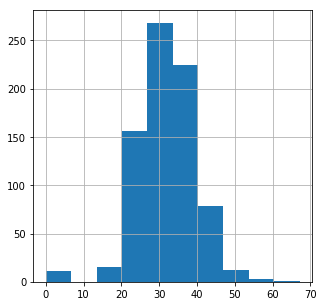

In [84]:
#distribuição da coluna BMI. Podemos ver que há valores isolados, que provavelmente são os valores zerados.

diabetes['BMI'].hist(figsize=(5,5))

In [85]:
#Substituiremos esses valores pela média

diabetes['BMI'].replace(0,diabetes['BMI'].mean(),inplace=True)

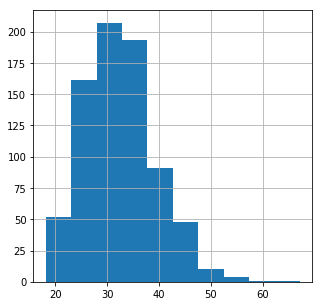

In [86]:
#distribuição da coluna após a imputação

diabetes['BMI'].hist(figsize=(5,5))

In [87]:
#criando as faixas de valores para BMI

diabetes['Faixa_BMI']=pd.qcut(diabetes['BMI'], 4)
diabetes['Faixa_BMI']

0                    (32.0, 36.6]
1      (18.198999999999998, 27.5]
2      (18.198999999999998, 27.5]
3                    (27.5, 32.0]
4                    (36.6, 67.1]
                  ...            
763                  (32.0, 36.6]
764                  (36.6, 67.1]
765    (18.198999999999998, 27.5]
766                  (27.5, 32.0]
767                  (27.5, 32.0]
Name: Faixa_BMI, Length: 768, dtype: category
Categories (4, interval[float64]): [(18.198999999999998, 27.5] < (27.5, 32.0] < (32.0, 36.6] < (36.6, 67.1]]

In [88]:
#ocorrências por faixa

diabetes['Faixa_BMI'].value_counts(ascending=False)

(32.0, 36.6]                  194
(27.5, 32.0]                  193
(18.198999999999998, 27.5]    193
(36.6, 67.1]                  188
Name: Faixa_BMI, dtype: int64

In [89]:
#taxa de ocorrência de diabetes por intervalos: a medida que o IMC aumenta a taxa de ocorrência de pessoas com diabetes também
#aumenta

diabetes[['Faixa_BMI','Outcome']].groupby(['Faixa_BMI'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Faixa_BMI,Outcome
3,"(36.6, 67.1]",0.484043
2,"(32.0, 36.6]",0.453608
1,"(27.5, 32.0]",0.347150
0,"(18.198999999999998, 27.5]",0.113990


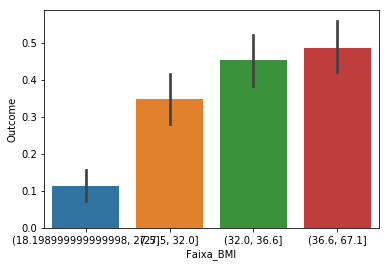

In [90]:
#resultado anterior de forma gráfica

sns.barplot(x="Faixa_BMI", y="Outcome", data=diabetes)

In [91]:
#Substituição dos intervalos por valores

for i in bases:    
    i.loc[ i['BMI'] <= 27.5, 'BMI'] = 0
    i.loc[(i['BMI'] >27.5) & (i['BMI'] <= 32), 'BMI'] = 1
    i.loc[(i['BMI'] >32) & (i['Glucose'] <= 36.6), 'BMI'] = 2
    i.loc[i['BMI'] > 36.6,'BMI'] = 3

In [92]:
#transformando os valores em inteiros (int)

X_treino['BMI']=X_treino['BMI'].astype(int)
X_teste['BMI']=X_teste['BMI'].astype(int)

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
#datasets de treino e test

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,2,0,0,0,2,0.569,3
73,2,2,3,0,2,2,0.231,0
352,1,0,3,0,0,2,0.243,3
497,1,0,1,0,1,1,0.547,1
145,0,1,2,0,0,0,0.572,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,0,0,1,2,2,0.430,3
324,1,1,2,1,0,2,0.148,0
624,1,1,0,0,0,1,0.158,0
690,3,1,2,0,0,0,0.856,2
473,3,2,3,0,0,1,0.210,3


# Análise e tratamento da coluna DiabetesPedigreeFunction

In [94]:
#Não há valores ausentes

diabetes['DiabetesPedigreeFunction'].isna().sum()

0

In [95]:
#Nem valores zerados

diabetes['DiabetesPedigreeFunction'].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

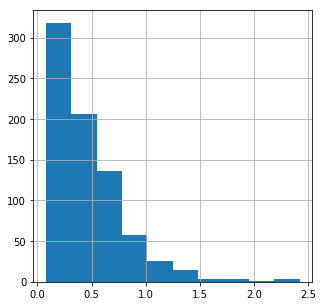

In [96]:
#distribuição da coluna DiabetesPedigreeFunction

diabetes['DiabetesPedigreeFunction'].hist(figsize=(5,5))

In [97]:
#criando os intervalos

diabetes['Faixa_DPF']=pd.qcut(diabetes['DiabetesPedigreeFunction'], 4)
diabetes['Faixa_DPF']

0       (0.626, 2.42]
1      (0.244, 0.372]
2       (0.626, 2.42]
3      (0.077, 0.244]
4       (0.626, 2.42]
            ...      
763    (0.077, 0.244]
764    (0.244, 0.372]
765    (0.244, 0.372]
766    (0.244, 0.372]
767    (0.244, 0.372]
Name: Faixa_DPF, Length: 768, dtype: category
Categories (4, interval[float64]): [(0.077, 0.244] < (0.244, 0.372] < (0.372, 0.626] < (0.626, 2.42]]

In [98]:
#Interessanye é no caso dessa colunas, o número de ocorrências são iguais para todas as faixas

diabetes['Faixa_DPF'].value_counts(ascending=False)

(0.626, 2.42]     192
(0.372, 0.626]    192
(0.244, 0.372]    192
(0.077, 0.244]    192
Name: Faixa_DPF, dtype: int64

In [99]:
#A taxa de ocorrência de diabetes aumenta a medida que os valores da coluna DiabetesPedigreeFunction também aumentam

diabetes[['Faixa_DPF','Outcome']].groupby(['Faixa_DPF'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

,Faixa_DPF,Outcome
3,"(0.626, 2.42]",0.484375
1,"(0.244, 0.372]",0.333333
2,"(0.372, 0.626]",0.322917
0,"(0.077, 0.244]",0.255208


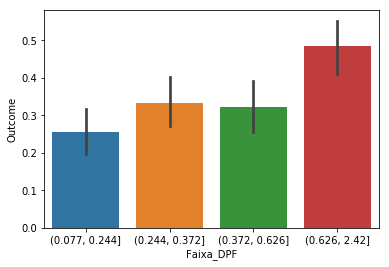

In [100]:
#resultado anterior de forma gráfica

sns.barplot(x="Faixa_DPF", y="Outcome", data=diabetes)

In [101]:
#substituição dos intervalos por valores numéricos

for i in bases:    
    i.loc[ i['DiabetesPedigreeFunction'] <= 0.244, 'DiabetesPedigreeFunction'] = 0
    i.loc[(i['DiabetesPedigreeFunction'] >0.244) & (i['DiabetesPedigreeFunction'] <= 0.372), 'DiabetesPedigreeFunction'] = 1
    i.loc[(i['DiabetesPedigreeFunction'] >0.372) & (i['DiabetesPedigreeFunction'] <= 0.626), 'DiabetesPedigreeFunction'] = 2
    i.loc[i['DiabetesPedigreeFunction'] > 0.626,'DiabetesPedigreeFunction'] = 3

In [102]:
#transnformando os valores da coluna em questão para valores interiros

X_treino['DiabetesPedigreeFunction']=X_treino['DiabetesPedigreeFunction'].astype(int)
X_teste['DiabetesPedigreeFunction']=X_teste['DiabetesPedigreeFunction'].astype(int)

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
#enfim, podemos ver que o dataset está todo categorizados com valores inteiros

#podemos usá-lo para treinar e testar o algoritmo

display(X_treino.head())
display(X_teste.head())
bases=[X_treino,X_teste]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,3,2,0,0,0,2,3,3
73,2,2,3,0,2,2,0,0
352,1,0,3,0,0,2,0,3
497,1,0,1,0,1,1,3,1
145,0,1,2,0,0,0,3,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,2,0,0,1,2,2,3,3
324,1,1,2,1,0,2,0,0
624,1,1,0,0,0,1,0,0
690,3,1,2,0,0,0,3,2
473,3,2,3,0,0,1,0,3


# **MODELO REGRESSÃO LOGÍSTICA**

**Instanciando o modelo de Regressão Logística**

In [104]:
diabetes_LR=LogisticRegression()

**Treinando o modelo de Regressão Logística**

In [105]:
diabetes_LR.fit(X_treino,y_treino)
import warnings
warnings.filterwarnings("ignore")

**Intercepto e coeficientes do modelo**

In [106]:
diabetes_LR.intercept_,diabetes_LR.coef_

(array([-4.50088334]),
 array([[-0.03028621,  0.97530144, -0.21437404,  0.36319781, -0.15098212,
          0.78842667,  0.20662279,  0.68696545]]))

**Usando o modelo gerado para fazer previsões com os dados de teste**

In [107]:
diabetes_LR.predict(X_teste)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

Atribuindo dos dados de previsão e reais a outras variáveis.

In [108]:
diabetes_pred = diabetes_LR.predict(X_teste)

In [109]:
diabetes_real = y_teste

**MATRIZ DE CONFUSÃO**

Vamos agora usar a matriz de confusão para visualizar o quanto o modelo confundiu de uma classe para outra.

In [110]:
print(pd.crosstab(diabetes_real,diabetes_pred,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         93  30  123
1         25  44   69
All      118  74  192


A matriz de confusão mostrou que o modelo das 123 observações da que são 0 ele acertou 104 e "confunfiu" 19 como 1, já a para as 69 observações que são 1, o modelo acertou 41 e confundiu 28 como 0.

**CROSS VALIDATION**

Agora usaremos a validação cruzada que avalia a capacidade de generalização de um modelo, a partir de um conjunto de dados. Com isso iremos também obter a acurácia do modelo de regressão logística.

**Importando o módulo da Scikit-Learn**

In [111]:
from sklearn.model_selection import cross_val_predict

**Aplicando o cross validation**

In [112]:
resultados = cross_val_predict(diabetes_LR,features,classe,cv=10)

**Importando módulo Metrics**

In [113]:
from sklearn import metrics

**Obtendo a Acurácia do modelo**

In [114]:
print(metrics.accuracy_score(classe,resultados)*100)

77.34375


Como podemos ver a acurácia do modelo é de 77.34%, que a princípio é um bom nível de acurácia.

**MÉTRICAS DE AVALIAÇÃO**

A métricas de avaliação mais usadas para avaliar o modelos são a **precisão** e a **revocação**.

A **precisão** é a dada pelo número de Verdadeiros-positivos (VP) dividido pela soma do número de Verdadeiros-positivos e número de Falsos-positivos: VP/(VP+FP).

Já a **revocação** é dada pelo número de Verdadeiros-positivos (VP) dividido pela soma do número de Verdadeiros-positivos (VP) e número de Verdadeiros-negativos (VN): VP/(VP+VN).

In [115]:
resultados=cross_val_predict(diabetes_LR,features,classe,cv=10)
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados,valor_classe))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.77      0.77       768



Podemos observar que a precisão média é de 76%, sendo 79% para classe 0 e 73% para classe 1. A revocação (recall) é maior para a classe 0 (89%) e apenas 55% para a classe 1. O f1-score, que é a média harmônica entre a precisão e revocação, também é maior para classe 0 (83%) do que para a classe 1 (63%). 

# MODELO SUPPORT VECTOR MACHINE

**Instanciando o modelo SVM**

In [116]:
diabetes_SVM=svm.SVC()

diabetes_SVM.fit(X_treino,y_treino)

diabetes_SVM.predict(X_teste)

diabetes_pred2 = diabetes_SVM.predict(X_teste)

diabetes_real2 = y_teste

**MATRIZ DE CONFUSÃO**

In [117]:
print(pd.crosstab(diabetes_real2,diabetes_pred2,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         97  26  123
1         28  41   69
All      125  67  192


**CROSS VALIDATION**

In [118]:
resultados2 = cross_val_predict(diabetes_SVM,features,classe,cv=10)

**ACURÁCIA DO MODELO SVM**

In [119]:
print(metrics.accuracy_score(classe,resultados2)*100)

75.78125


**MÉTRICAS DE AVALIAÇÃO**

In [120]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados2,valor_classe))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       500
           1       0.74      0.47      0.58       268

    accuracy                           0.76       768
   macro avg       0.75      0.69      0.70       768
weighted avg       0.76      0.76      0.74       768



# MODELO CAT BOOST

**Instanciando, treinando e gerando previsões com o modelo Cat Boost**

In [121]:
from catboost import CatBoostClassifier

diabetes_cat=CatBoostClassifier().fit(X_treino,y_treino)

diabetes_cat.predict(X_teste)

diabetes_pred3 = diabetes_cat.predict(X_teste)

diabetes_real3 =y_teste

Learning rate set to 0.00814
0:	learn: 0.6907512	total: 331ms	remaining: 5m 30s
1:	learn: 0.6875431	total: 332ms	remaining: 2m 45s
2:	learn: 0.6841689	total: 333ms	remaining: 1m 50s
3:	learn: 0.6796523	total: 333ms	remaining: 1m 23s
4:	learn: 0.6752866	total: 334ms	remaining: 1m 6s
5:	learn: 0.6714067	total: 335ms	remaining: 55.5s
6:	learn: 0.6671379	total: 336ms	remaining: 47.6s
7:	learn: 0.6629825	total: 336ms	remaining: 41.7s
8:	learn: 0.6585411	total: 337ms	remaining: 37.1s
9:	learn: 0.6550432	total: 338ms	remaining: 33.5s
10:	learn: 0.6512954	total: 339ms	remaining: 30.5s
11:	learn: 0.6468942	total: 340ms	remaining: 28s
12:	learn: 0.6426688	total: 341ms	remaining: 25.9s
13:	learn: 0.6393884	total: 342ms	remaining: 24.1s
14:	learn: 0.6352349	total: 343ms	remaining: 22.5s
15:	learn: 0.6312091	total: 343ms	remaining: 21.1s
16:	learn: 0.6277503	total: 344ms	remaining: 19.9s
17:	learn: 0.6248017	total: 345ms	remaining: 18.8s
18:	learn: 0.6217349	total: 346ms	remaining: 17.9s
19:	learn:

191:	learn: 0.4098841	total: 477ms	remaining: 2.01s
192:	learn: 0.4093792	total: 478ms	remaining: 2s
193:	learn: 0.4089300	total: 479ms	remaining: 1.99s
194:	learn: 0.4081005	total: 480ms	remaining: 1.98s
195:	learn: 0.4074361	total: 481ms	remaining: 1.97s
196:	learn: 0.4071525	total: 482ms	remaining: 1.96s
197:	learn: 0.4065562	total: 483ms	remaining: 1.96s
198:	learn: 0.4059805	total: 484ms	remaining: 1.95s
199:	learn: 0.4053122	total: 485ms	remaining: 1.94s
200:	learn: 0.4048402	total: 486ms	remaining: 1.93s
201:	learn: 0.4043712	total: 487ms	remaining: 1.92s
202:	learn: 0.4038019	total: 488ms	remaining: 1.92s
203:	learn: 0.4032384	total: 491ms	remaining: 1.91s
204:	learn: 0.4026625	total: 492ms	remaining: 1.91s
205:	learn: 0.4021951	total: 493ms	remaining: 1.9s
206:	learn: 0.4018411	total: 494ms	remaining: 1.89s
207:	learn: 0.4017515	total: 495ms	remaining: 1.88s
208:	learn: 0.4013430	total: 498ms	remaining: 1.88s
209:	learn: 0.4007890	total: 499ms	remaining: 1.88s
210:	learn: 0.40

351:	learn: 0.3521561	total: 621ms	remaining: 1.14s
352:	learn: 0.3517842	total: 622ms	remaining: 1.14s
353:	learn: 0.3517210	total: 623ms	remaining: 1.14s
354:	learn: 0.3517061	total: 623ms	remaining: 1.13s
355:	learn: 0.3514186	total: 624ms	remaining: 1.13s
356:	learn: 0.3510497	total: 625ms	remaining: 1.13s
357:	learn: 0.3508669	total: 626ms	remaining: 1.12s
358:	learn: 0.3505313	total: 626ms	remaining: 1.12s
359:	learn: 0.3501080	total: 627ms	remaining: 1.11s
360:	learn: 0.3498224	total: 628ms	remaining: 1.11s
361:	learn: 0.3495799	total: 629ms	remaining: 1.11s
362:	learn: 0.3495575	total: 629ms	remaining: 1.1s
363:	learn: 0.3493959	total: 630ms	remaining: 1.1s
364:	learn: 0.3493893	total: 631ms	remaining: 1.1s
365:	learn: 0.3491338	total: 631ms	remaining: 1.09s
366:	learn: 0.3489374	total: 632ms	remaining: 1.09s
367:	learn: 0.3485876	total: 633ms	remaining: 1.09s
368:	learn: 0.3482044	total: 634ms	remaining: 1.08s
369:	learn: 0.3478878	total: 635ms	remaining: 1.08s
370:	learn: 0.3

545:	learn: 0.3058808	total: 771ms	remaining: 641ms
546:	learn: 0.3056703	total: 772ms	remaining: 639ms
547:	learn: 0.3054638	total: 773ms	remaining: 637ms
548:	learn: 0.3052100	total: 774ms	remaining: 635ms
549:	learn: 0.3051476	total: 774ms	remaining: 633ms
550:	learn: 0.3049215	total: 775ms	remaining: 631ms
551:	learn: 0.3047019	total: 776ms	remaining: 629ms
552:	learn: 0.3044223	total: 776ms	remaining: 627ms
553:	learn: 0.3041085	total: 777ms	remaining: 626ms
554:	learn: 0.3039523	total: 778ms	remaining: 624ms
555:	learn: 0.3037312	total: 779ms	remaining: 622ms
556:	learn: 0.3035076	total: 780ms	remaining: 620ms
557:	learn: 0.3033634	total: 781ms	remaining: 618ms
558:	learn: 0.3031345	total: 781ms	remaining: 616ms
559:	learn: 0.3029426	total: 782ms	remaining: 615ms
560:	learn: 0.3027412	total: 783ms	remaining: 613ms
561:	learn: 0.3025133	total: 784ms	remaining: 611ms
562:	learn: 0.3023843	total: 784ms	remaining: 609ms
563:	learn: 0.3021907	total: 785ms	remaining: 607ms
564:	learn: 

743:	learn: 0.2694892	total: 921ms	remaining: 317ms
744:	learn: 0.2692681	total: 922ms	remaining: 315ms
745:	learn: 0.2691242	total: 923ms	remaining: 314ms
746:	learn: 0.2689751	total: 924ms	remaining: 313ms
747:	learn: 0.2688295	total: 925ms	remaining: 312ms
748:	learn: 0.2686620	total: 926ms	remaining: 310ms
749:	learn: 0.2685092	total: 926ms	remaining: 309ms
750:	learn: 0.2683344	total: 927ms	remaining: 307ms
751:	learn: 0.2681141	total: 928ms	remaining: 306ms
752:	learn: 0.2679002	total: 929ms	remaining: 305ms
753:	learn: 0.2677395	total: 930ms	remaining: 303ms
754:	learn: 0.2677381	total: 930ms	remaining: 302ms
755:	learn: 0.2674967	total: 931ms	remaining: 300ms
756:	learn: 0.2674845	total: 932ms	remaining: 299ms
757:	learn: 0.2672955	total: 932ms	remaining: 298ms
758:	learn: 0.2671628	total: 933ms	remaining: 296ms
759:	learn: 0.2670460	total: 934ms	remaining: 295ms
760:	learn: 0.2668636	total: 935ms	remaining: 294ms
761:	learn: 0.2667553	total: 935ms	remaining: 292ms
762:	learn: 

928:	learn: 0.2382831	total: 1.07s	remaining: 81.6ms
929:	learn: 0.2381483	total: 1.07s	remaining: 80.4ms
930:	learn: 0.2380258	total: 1.07s	remaining: 79.2ms
931:	learn: 0.2379046	total: 1.07s	remaining: 78.1ms
932:	learn: 0.2377260	total: 1.07s	remaining: 76.9ms
933:	learn: 0.2376013	total: 1.07s	remaining: 75.7ms
934:	learn: 0.2374073	total: 1.07s	remaining: 74.6ms
935:	learn: 0.2372508	total: 1.07s	remaining: 73.4ms
936:	learn: 0.2371080	total: 1.07s	remaining: 72.2ms
937:	learn: 0.2369624	total: 1.07s	remaining: 71ms
938:	learn: 0.2368499	total: 1.07s	remaining: 69.8ms
939:	learn: 0.2367586	total: 1.07s	remaining: 68.7ms
940:	learn: 0.2366467	total: 1.08s	remaining: 67.5ms
941:	learn: 0.2366427	total: 1.08s	remaining: 66.3ms
942:	learn: 0.2365294	total: 1.08s	remaining: 65.1ms
943:	learn: 0.2363063	total: 1.08s	remaining: 64ms
944:	learn: 0.2361504	total: 1.08s	remaining: 62.8ms
945:	learn: 0.2360437	total: 1.08s	remaining: 61.7ms
946:	learn: 0.2358924	total: 1.08s	remaining: 60.5

**MATRIZ DE CONFUSÃO**

In [122]:
print(pd.crosstab(diabetes_real3,diabetes_pred3,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         90  33  123
1         29  40   69
All      119  73  192


**CROSS VALIDATION**

In [123]:
resultados3 = cross_val_predict(diabetes_cat,features,classe,cv=10)

Learning rate set to 0.008798
0:	learn: 0.6880601	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6842717	total: 4.67ms	remaining: 2.33s
2:	learn: 0.6801652	total: 6.44ms	remaining: 2.14s
3:	learn: 0.6755463	total: 7.94ms	remaining: 1.98s
4:	learn: 0.6722337	total: 9.34ms	remaining: 1.86s
5:	learn: 0.6674928	total: 11.1ms	remaining: 1.83s
6:	learn: 0.6634237	total: 12.9ms	remaining: 1.82s
7:	learn: 0.6599207	total: 14.7ms	remaining: 1.82s
8:	learn: 0.6553927	total: 16.1ms	remaining: 1.77s
9:	learn: 0.6523928	total: 17.5ms	remaining: 1.73s
10:	learn: 0.6482836	total: 19.1ms	remaining: 1.71s
11:	learn: 0.6448238	total: 20.7ms	remaining: 1.7s
12:	learn: 0.6409828	total: 23.1ms	remaining: 1.75s
13:	learn: 0.6372534	total: 24.5ms	remaining: 1.73s
14:	learn: 0.6335936	total: 25.9ms	remaining: 1.7s
15:	learn: 0.6305338	total: 27.6ms	remaining: 1.7s
16:	learn: 0.6271564	total: 29ms	remaining: 1.68s
17:	learn: 0.6241313	total: 31.3ms	remaining: 1.71s
18:	learn: 0.6203352	total: 32.8ms	remaining: 1.6

232:	learn: 0.3792120	total: 411ms	remaining: 1.35s
233:	learn: 0.3787225	total: 413ms	remaining: 1.35s
234:	learn: 0.3783053	total: 414ms	remaining: 1.35s
235:	learn: 0.3779593	total: 416ms	remaining: 1.35s
236:	learn: 0.3775888	total: 418ms	remaining: 1.34s
237:	learn: 0.3772794	total: 419ms	remaining: 1.34s
238:	learn: 0.3769470	total: 420ms	remaining: 1.34s
239:	learn: 0.3765572	total: 422ms	remaining: 1.33s
240:	learn: 0.3761575	total: 423ms	remaining: 1.33s
241:	learn: 0.3756789	total: 425ms	remaining: 1.33s
242:	learn: 0.3754004	total: 426ms	remaining: 1.33s
243:	learn: 0.3750372	total: 428ms	remaining: 1.32s
244:	learn: 0.3746294	total: 429ms	remaining: 1.32s
245:	learn: 0.3742026	total: 431ms	remaining: 1.32s
246:	learn: 0.3740520	total: 432ms	remaining: 1.32s
247:	learn: 0.3736833	total: 434ms	remaining: 1.32s
248:	learn: 0.3732874	total: 436ms	remaining: 1.31s
249:	learn: 0.3727847	total: 437ms	remaining: 1.31s
250:	learn: 0.3722199	total: 439ms	remaining: 1.31s
251:	learn: 

428:	learn: 0.3209505	total: 727ms	remaining: 967ms
429:	learn: 0.3207916	total: 729ms	remaining: 966ms
430:	learn: 0.3205801	total: 731ms	remaining: 965ms
431:	learn: 0.3203662	total: 732ms	remaining: 963ms
432:	learn: 0.3200564	total: 734ms	remaining: 961ms
433:	learn: 0.3198952	total: 735ms	remaining: 959ms
434:	learn: 0.3197102	total: 737ms	remaining: 958ms
435:	learn: 0.3195921	total: 739ms	remaining: 956ms
436:	learn: 0.3194399	total: 741ms	remaining: 954ms
437:	learn: 0.3190865	total: 742ms	remaining: 952ms
438:	learn: 0.3186444	total: 744ms	remaining: 951ms
439:	learn: 0.3183886	total: 746ms	remaining: 950ms
440:	learn: 0.3181304	total: 748ms	remaining: 948ms
441:	learn: 0.3178613	total: 749ms	remaining: 946ms
442:	learn: 0.3175581	total: 751ms	remaining: 944ms
443:	learn: 0.3172519	total: 753ms	remaining: 942ms
444:	learn: 0.3169695	total: 755ms	remaining: 941ms
445:	learn: 0.3166451	total: 756ms	remaining: 939ms
446:	learn: 0.3162018	total: 758ms	remaining: 938ms
447:	learn: 

622:	learn: 0.2801107	total: 1.04s	remaining: 631ms
623:	learn: 0.2799855	total: 1.04s	remaining: 629ms
624:	learn: 0.2798064	total: 1.05s	remaining: 628ms
625:	learn: 0.2796072	total: 1.05s	remaining: 627ms
626:	learn: 0.2795394	total: 1.05s	remaining: 625ms
627:	learn: 0.2793708	total: 1.05s	remaining: 623ms
628:	learn: 0.2791578	total: 1.05s	remaining: 621ms
629:	learn: 0.2790591	total: 1.05s	remaining: 620ms
630:	learn: 0.2787637	total: 1.06s	remaining: 618ms
631:	learn: 0.2785298	total: 1.06s	remaining: 617ms
632:	learn: 0.2783479	total: 1.06s	remaining: 615ms
633:	learn: 0.2779872	total: 1.06s	remaining: 613ms
634:	learn: 0.2778002	total: 1.06s	remaining: 611ms
635:	learn: 0.2776741	total: 1.06s	remaining: 610ms
636:	learn: 0.2773279	total: 1.07s	remaining: 608ms
637:	learn: 0.2772156	total: 1.07s	remaining: 606ms
638:	learn: 0.2771445	total: 1.07s	remaining: 604ms
639:	learn: 0.2770339	total: 1.07s	remaining: 602ms
640:	learn: 0.2768902	total: 1.07s	remaining: 601ms
641:	learn: 

801:	learn: 0.2479048	total: 1.35s	remaining: 334ms
802:	learn: 0.2478496	total: 1.36s	remaining: 333ms
803:	learn: 0.2474078	total: 1.36s	remaining: 331ms
804:	learn: 0.2473419	total: 1.36s	remaining: 329ms
805:	learn: 0.2471452	total: 1.36s	remaining: 328ms
806:	learn: 0.2470218	total: 1.36s	remaining: 326ms
807:	learn: 0.2468993	total: 1.36s	remaining: 324ms
808:	learn: 0.2467105	total: 1.37s	remaining: 323ms
809:	learn: 0.2465040	total: 1.37s	remaining: 321ms
810:	learn: 0.2464126	total: 1.37s	remaining: 319ms
811:	learn: 0.2462877	total: 1.37s	remaining: 317ms
812:	learn: 0.2460497	total: 1.37s	remaining: 316ms
813:	learn: 0.2458743	total: 1.37s	remaining: 314ms
814:	learn: 0.2457572	total: 1.38s	remaining: 312ms
815:	learn: 0.2456226	total: 1.38s	remaining: 310ms
816:	learn: 0.2453627	total: 1.38s	remaining: 309ms
817:	learn: 0.2451996	total: 1.38s	remaining: 307ms
818:	learn: 0.2447400	total: 1.38s	remaining: 305ms
819:	learn: 0.2444993	total: 1.38s	remaining: 304ms
820:	learn: 

986:	learn: 0.2156636	total: 1.67s	remaining: 22ms
987:	learn: 0.2156002	total: 1.67s	remaining: 20.3ms
988:	learn: 0.2152143	total: 1.67s	remaining: 18.6ms
989:	learn: 0.2150414	total: 1.67s	remaining: 16.9ms
990:	learn: 0.2149010	total: 1.68s	remaining: 15.2ms
991:	learn: 0.2147256	total: 1.68s	remaining: 13.5ms
992:	learn: 0.2143870	total: 1.68s	remaining: 11.8ms
993:	learn: 0.2142233	total: 1.68s	remaining: 10.1ms
994:	learn: 0.2140306	total: 1.68s	remaining: 8.46ms
995:	learn: 0.2138821	total: 1.68s	remaining: 6.76ms
996:	learn: 0.2137449	total: 1.69s	remaining: 5.07ms
997:	learn: 0.2135128	total: 1.69s	remaining: 3.38ms
998:	learn: 0.2133721	total: 1.69s	remaining: 1.69ms
999:	learn: 0.2131734	total: 1.69s	remaining: 0us
Learning rate set to 0.008798
0:	learn: 0.6879334	total: 2.17ms	remaining: 2.17s
1:	learn: 0.6840093	total: 5.57ms	remaining: 2.78s
2:	learn: 0.6796563	total: 7.51ms	remaining: 2.5s
3:	learn: 0.6756661	total: 9.3ms	remaining: 2.32s
4:	learn: 0.6724011	total: 11.4

184:	learn: 0.4025951	total: 318ms	remaining: 1.4s
185:	learn: 0.4019343	total: 320ms	remaining: 1.4s
186:	learn: 0.4011200	total: 321ms	remaining: 1.4s
187:	learn: 0.4004703	total: 323ms	remaining: 1.39s
188:	learn: 0.3999480	total: 324ms	remaining: 1.39s
189:	learn: 0.3994161	total: 326ms	remaining: 1.39s
190:	learn: 0.3988369	total: 327ms	remaining: 1.39s
191:	learn: 0.3981698	total: 329ms	remaining: 1.38s
192:	learn: 0.3975688	total: 330ms	remaining: 1.38s
193:	learn: 0.3972475	total: 332ms	remaining: 1.38s
194:	learn: 0.3967005	total: 333ms	remaining: 1.37s
195:	learn: 0.3964705	total: 334ms	remaining: 1.37s
196:	learn: 0.3958853	total: 336ms	remaining: 1.37s
197:	learn: 0.3954272	total: 338ms	remaining: 1.37s
198:	learn: 0.3947986	total: 339ms	remaining: 1.36s
199:	learn: 0.3942955	total: 340ms	remaining: 1.36s
200:	learn: 0.3937698	total: 342ms	remaining: 1.36s
201:	learn: 0.3931298	total: 343ms	remaining: 1.36s
202:	learn: 0.3929053	total: 346ms	remaining: 1.36s
203:	learn: 0.3

390:	learn: 0.3309594	total: 636ms	remaining: 991ms
391:	learn: 0.3307775	total: 638ms	remaining: 989ms
392:	learn: 0.3304199	total: 639ms	remaining: 987ms
393:	learn: 0.3302523	total: 642ms	remaining: 987ms
394:	learn: 0.3300295	total: 643ms	remaining: 985ms
395:	learn: 0.3298682	total: 644ms	remaining: 983ms
396:	learn: 0.3295931	total: 646ms	remaining: 981ms
397:	learn: 0.3293485	total: 647ms	remaining: 979ms
398:	learn: 0.3291764	total: 649ms	remaining: 977ms
399:	learn: 0.3290406	total: 651ms	remaining: 976ms
400:	learn: 0.3288562	total: 652ms	remaining: 974ms
401:	learn: 0.3286907	total: 654ms	remaining: 972ms
402:	learn: 0.3285860	total: 655ms	remaining: 970ms
403:	learn: 0.3284204	total: 656ms	remaining: 968ms
404:	learn: 0.3280746	total: 659ms	remaining: 968ms
405:	learn: 0.3278362	total: 660ms	remaining: 966ms
406:	learn: 0.3273967	total: 661ms	remaining: 963ms
407:	learn: 0.3270993	total: 663ms	remaining: 961ms
408:	learn: 0.3268270	total: 664ms	remaining: 959ms
409:	learn: 

571:	learn: 0.2906018	total: 953ms	remaining: 713ms
572:	learn: 0.2904142	total: 955ms	remaining: 712ms
573:	learn: 0.2902435	total: 957ms	remaining: 710ms
574:	learn: 0.2899115	total: 958ms	remaining: 708ms
575:	learn: 0.2897239	total: 959ms	remaining: 706ms
576:	learn: 0.2895418	total: 961ms	remaining: 704ms
577:	learn: 0.2891963	total: 963ms	remaining: 703ms
578:	learn: 0.2889659	total: 965ms	remaining: 701ms
579:	learn: 0.2887807	total: 966ms	remaining: 700ms
580:	learn: 0.2885702	total: 967ms	remaining: 698ms
581:	learn: 0.2884027	total: 969ms	remaining: 696ms
582:	learn: 0.2882002	total: 970ms	remaining: 694ms
583:	learn: 0.2879810	total: 972ms	remaining: 693ms
584:	learn: 0.2878464	total: 974ms	remaining: 691ms
585:	learn: 0.2876971	total: 975ms	remaining: 689ms
586:	learn: 0.2875169	total: 976ms	remaining: 687ms
587:	learn: 0.2873731	total: 978ms	remaining: 685ms
588:	learn: 0.2872818	total: 980ms	remaining: 684ms
589:	learn: 0.2869218	total: 982ms	remaining: 682ms
590:	learn: 

769:	learn: 0.2518279	total: 1.27s	remaining: 379ms
770:	learn: 0.2516971	total: 1.27s	remaining: 377ms
771:	learn: 0.2515949	total: 1.27s	remaining: 375ms
772:	learn: 0.2514668	total: 1.27s	remaining: 374ms
773:	learn: 0.2513452	total: 1.27s	remaining: 372ms
774:	learn: 0.2509731	total: 1.28s	remaining: 370ms
775:	learn: 0.2507089	total: 1.28s	remaining: 369ms
776:	learn: 0.2504549	total: 1.28s	remaining: 367ms
777:	learn: 0.2501005	total: 1.28s	remaining: 365ms
778:	learn: 0.2498433	total: 1.28s	remaining: 364ms
779:	learn: 0.2497081	total: 1.28s	remaining: 362ms
780:	learn: 0.2495552	total: 1.28s	remaining: 360ms
781:	learn: 0.2494203	total: 1.29s	remaining: 359ms
782:	learn: 0.2492896	total: 1.29s	remaining: 357ms
783:	learn: 0.2491910	total: 1.29s	remaining: 355ms
784:	learn: 0.2490084	total: 1.29s	remaining: 354ms
785:	learn: 0.2486995	total: 1.29s	remaining: 352ms
786:	learn: 0.2483288	total: 1.29s	remaining: 350ms
787:	learn: 0.2481716	total: 1.29s	remaining: 348ms
788:	learn: 

974:	learn: 0.2184108	total: 1.58s	remaining: 40.7ms
975:	learn: 0.2182044	total: 1.59s	remaining: 39ms
976:	learn: 0.2180287	total: 1.59s	remaining: 37.4ms
977:	learn: 0.2178602	total: 1.59s	remaining: 35.8ms
978:	learn: 0.2177071	total: 1.59s	remaining: 34.2ms
979:	learn: 0.2174632	total: 1.6s	remaining: 32.6ms
980:	learn: 0.2173979	total: 1.6s	remaining: 31ms
981:	learn: 0.2172729	total: 1.6s	remaining: 29.4ms
982:	learn: 0.2171280	total: 1.6s	remaining: 27.7ms
983:	learn: 0.2169519	total: 1.61s	remaining: 26.1ms
984:	learn: 0.2168629	total: 1.61s	remaining: 24.5ms
985:	learn: 0.2165455	total: 1.61s	remaining: 22.9ms
986:	learn: 0.2164185	total: 1.61s	remaining: 21.3ms
987:	learn: 0.2162008	total: 1.61s	remaining: 19.6ms
988:	learn: 0.2160206	total: 1.62s	remaining: 18ms
989:	learn: 0.2159375	total: 1.62s	remaining: 16.4ms
990:	learn: 0.2158046	total: 1.62s	remaining: 14.7ms
991:	learn: 0.2156952	total: 1.62s	remaining: 13.1ms
992:	learn: 0.2155522	total: 1.63s	remaining: 11.5ms
993

181:	learn: 0.4047155	total: 313ms	remaining: 1.41s
182:	learn: 0.4042889	total: 315ms	remaining: 1.41s
183:	learn: 0.4036090	total: 317ms	remaining: 1.41s
184:	learn: 0.4029081	total: 319ms	remaining: 1.4s
185:	learn: 0.4022998	total: 320ms	remaining: 1.4s
186:	learn: 0.4015781	total: 322ms	remaining: 1.4s
187:	learn: 0.4010541	total: 323ms	remaining: 1.4s
188:	learn: 0.4005032	total: 324ms	remaining: 1.39s
189:	learn: 0.4000147	total: 326ms	remaining: 1.39s
190:	learn: 0.3994736	total: 328ms	remaining: 1.39s
191:	learn: 0.3988499	total: 329ms	remaining: 1.38s
192:	learn: 0.3982327	total: 330ms	remaining: 1.38s
193:	learn: 0.3978769	total: 332ms	remaining: 1.38s
194:	learn: 0.3972991	total: 333ms	remaining: 1.37s
195:	learn: 0.3968270	total: 335ms	remaining: 1.38s
196:	learn: 0.3964871	total: 337ms	remaining: 1.37s
197:	learn: 0.3960457	total: 338ms	remaining: 1.37s
198:	learn: 0.3956938	total: 339ms	remaining: 1.37s
199:	learn: 0.3951496	total: 341ms	remaining: 1.36s
200:	learn: 0.39

386:	learn: 0.3282453	total: 632ms	remaining: 1s
387:	learn: 0.3280044	total: 634ms	remaining: 1000ms
388:	learn: 0.3277055	total: 635ms	remaining: 998ms
389:	learn: 0.3274194	total: 636ms	remaining: 996ms
390:	learn: 0.3273134	total: 638ms	remaining: 994ms
391:	learn: 0.3270977	total: 641ms	remaining: 994ms
392:	learn: 0.3267463	total: 643ms	remaining: 992ms
393:	learn: 0.3265040	total: 644ms	remaining: 991ms
394:	learn: 0.3261100	total: 647ms	remaining: 990ms
395:	learn: 0.3257046	total: 650ms	remaining: 991ms
396:	learn: 0.3255192	total: 652ms	remaining: 990ms
397:	learn: 0.3251626	total: 654ms	remaining: 989ms
398:	learn: 0.3249392	total: 657ms	remaining: 990ms
399:	learn: 0.3247663	total: 659ms	remaining: 989ms
400:	learn: 0.3244642	total: 661ms	remaining: 987ms
401:	learn: 0.3242959	total: 663ms	remaining: 986ms
402:	learn: 0.3239328	total: 666ms	remaining: 987ms
403:	learn: 0.3235979	total: 669ms	remaining: 986ms
404:	learn: 0.3234267	total: 672ms	remaining: 987ms
405:	learn: 0.

568:	learn: 0.2867101	total: 946ms	remaining: 716ms
569:	learn: 0.2863970	total: 948ms	remaining: 715ms
570:	learn: 0.2861723	total: 950ms	remaining: 714ms
571:	learn: 0.2858570	total: 951ms	remaining: 712ms
572:	learn: 0.2855613	total: 952ms	remaining: 710ms
573:	learn: 0.2853208	total: 954ms	remaining: 708ms
574:	learn: 0.2849749	total: 955ms	remaining: 706ms
575:	learn: 0.2848436	total: 957ms	remaining: 704ms
576:	learn: 0.2846142	total: 959ms	remaining: 703ms
577:	learn: 0.2842073	total: 960ms	remaining: 701ms
578:	learn: 0.2840847	total: 962ms	remaining: 699ms
579:	learn: 0.2839094	total: 963ms	remaining: 697ms
580:	learn: 0.2836002	total: 964ms	remaining: 695ms
581:	learn: 0.2835394	total: 967ms	remaining: 694ms
582:	learn: 0.2832657	total: 968ms	remaining: 692ms
583:	learn: 0.2831289	total: 969ms	remaining: 690ms
584:	learn: 0.2830328	total: 971ms	remaining: 689ms
585:	learn: 0.2828483	total: 972ms	remaining: 687ms
586:	learn: 0.2823252	total: 973ms	remaining: 685ms
587:	learn: 

772:	learn: 0.2467130	total: 1.26s	remaining: 371ms
773:	learn: 0.2465881	total: 1.26s	remaining: 369ms
774:	learn: 0.2463181	total: 1.26s	remaining: 367ms
775:	learn: 0.2461250	total: 1.27s	remaining: 366ms
776:	learn: 0.2460427	total: 1.27s	remaining: 364ms
777:	learn: 0.2459324	total: 1.27s	remaining: 362ms
778:	learn: 0.2457561	total: 1.27s	remaining: 361ms
779:	learn: 0.2455585	total: 1.27s	remaining: 359ms
780:	learn: 0.2453271	total: 1.27s	remaining: 357ms
781:	learn: 0.2450847	total: 1.28s	remaining: 356ms
782:	learn: 0.2449208	total: 1.28s	remaining: 354ms
783:	learn: 0.2447065	total: 1.28s	remaining: 353ms
784:	learn: 0.2445962	total: 1.28s	remaining: 351ms
785:	learn: 0.2444417	total: 1.28s	remaining: 349ms
786:	learn: 0.2443503	total: 1.28s	remaining: 348ms
787:	learn: 0.2439430	total: 1.29s	remaining: 346ms
788:	learn: 0.2438131	total: 1.29s	remaining: 344ms
789:	learn: 0.2435033	total: 1.29s	remaining: 343ms
790:	learn: 0.2433376	total: 1.29s	remaining: 341ms
791:	learn: 

971:	learn: 0.2135394	total: 1.58s	remaining: 45.5ms
972:	learn: 0.2133760	total: 1.58s	remaining: 43.9ms
973:	learn: 0.2132838	total: 1.59s	remaining: 42.3ms
974:	learn: 0.2131494	total: 1.59s	remaining: 40.7ms
975:	learn: 0.2129830	total: 1.59s	remaining: 39.2ms
976:	learn: 0.2128367	total: 1.59s	remaining: 37.6ms
977:	learn: 0.2126765	total: 1.6s	remaining: 36ms
978:	learn: 0.2124725	total: 1.6s	remaining: 34.4ms
979:	learn: 0.2123815	total: 1.6s	remaining: 32.7ms
980:	learn: 0.2122764	total: 1.6s	remaining: 31.1ms
981:	learn: 0.2122207	total: 1.61s	remaining: 29.5ms
982:	learn: 0.2120279	total: 1.61s	remaining: 27.9ms
983:	learn: 0.2118910	total: 1.61s	remaining: 26.2ms
984:	learn: 0.2116468	total: 1.61s	remaining: 24.6ms
985:	learn: 0.2114921	total: 1.62s	remaining: 23ms
986:	learn: 0.2112930	total: 1.62s	remaining: 21.3ms
987:	learn: 0.2112567	total: 1.62s	remaining: 19.7ms
988:	learn: 0.2111254	total: 1.63s	remaining: 18.1ms
989:	learn: 0.2110679	total: 1.63s	remaining: 16.4ms
9

173:	learn: 0.4014830	total: 321ms	remaining: 1.52s
174:	learn: 0.4009624	total: 323ms	remaining: 1.52s
175:	learn: 0.4003787	total: 325ms	remaining: 1.52s
176:	learn: 0.3998977	total: 326ms	remaining: 1.52s
177:	learn: 0.3996141	total: 328ms	remaining: 1.51s
178:	learn: 0.3988772	total: 330ms	remaining: 1.51s
179:	learn: 0.3983545	total: 331ms	remaining: 1.51s
180:	learn: 0.3980253	total: 333ms	remaining: 1.51s
181:	learn: 0.3973580	total: 334ms	remaining: 1.5s
182:	learn: 0.3968709	total: 336ms	remaining: 1.5s
183:	learn: 0.3962560	total: 337ms	remaining: 1.5s
184:	learn: 0.3954826	total: 339ms	remaining: 1.49s
185:	learn: 0.3950293	total: 341ms	remaining: 1.49s
186:	learn: 0.3942494	total: 342ms	remaining: 1.49s
187:	learn: 0.3937158	total: 343ms	remaining: 1.48s
188:	learn: 0.3931012	total: 345ms	remaining: 1.48s
189:	learn: 0.3925379	total: 346ms	remaining: 1.48s
190:	learn: 0.3919443	total: 348ms	remaining: 1.48s
191:	learn: 0.3913213	total: 350ms	remaining: 1.47s
192:	learn: 0.3

371:	learn: 0.3313150	total: 639ms	remaining: 1.08s
372:	learn: 0.3309697	total: 641ms	remaining: 1.08s
373:	learn: 0.3308840	total: 646ms	remaining: 1.08s
374:	learn: 0.3304931	total: 649ms	remaining: 1.08s
375:	learn: 0.3302853	total: 653ms	remaining: 1.08s
376:	learn: 0.3299020	total: 657ms	remaining: 1.08s
377:	learn: 0.3296356	total: 660ms	remaining: 1.08s
378:	learn: 0.3294128	total: 663ms	remaining: 1.09s
379:	learn: 0.3291114	total: 666ms	remaining: 1.09s
380:	learn: 0.3288008	total: 669ms	remaining: 1.09s
381:	learn: 0.3284784	total: 671ms	remaining: 1.09s
382:	learn: 0.3279281	total: 673ms	remaining: 1.08s
383:	learn: 0.3275130	total: 676ms	remaining: 1.08s
384:	learn: 0.3273350	total: 681ms	remaining: 1.09s
385:	learn: 0.3271053	total: 683ms	remaining: 1.09s
386:	learn: 0.3267790	total: 685ms	remaining: 1.08s
387:	learn: 0.3265651	total: 688ms	remaining: 1.08s
388:	learn: 0.3263783	total: 690ms	remaining: 1.08s
389:	learn: 0.3260525	total: 697ms	remaining: 1.09s
390:	learn: 

555:	learn: 0.2905401	total: 956ms	remaining: 763ms
556:	learn: 0.2904497	total: 958ms	remaining: 762ms
557:	learn: 0.2900823	total: 959ms	remaining: 760ms
558:	learn: 0.2899404	total: 960ms	remaining: 758ms
559:	learn: 0.2897741	total: 962ms	remaining: 756ms
560:	learn: 0.2895810	total: 964ms	remaining: 754ms
561:	learn: 0.2892507	total: 966ms	remaining: 753ms
562:	learn: 0.2889409	total: 968ms	remaining: 751ms
563:	learn: 0.2888425	total: 969ms	remaining: 749ms
564:	learn: 0.2886908	total: 970ms	remaining: 747ms
565:	learn: 0.2884566	total: 972ms	remaining: 745ms
566:	learn: 0.2882421	total: 974ms	remaining: 744ms
567:	learn: 0.2880079	total: 976ms	remaining: 742ms
568:	learn: 0.2878128	total: 977ms	remaining: 740ms
569:	learn: 0.2876231	total: 978ms	remaining: 738ms
570:	learn: 0.2875778	total: 980ms	remaining: 736ms
571:	learn: 0.2874623	total: 982ms	remaining: 735ms
572:	learn: 0.2872813	total: 983ms	remaining: 733ms
573:	learn: 0.2871417	total: 985ms	remaining: 731ms
574:	learn: 

758:	learn: 0.2517599	total: 1.27s	remaining: 404ms
759:	learn: 0.2514330	total: 1.27s	remaining: 402ms
760:	learn: 0.2513429	total: 1.27s	remaining: 401ms
761:	learn: 0.2511171	total: 1.28s	remaining: 399ms
762:	learn: 0.2508539	total: 1.28s	remaining: 397ms
763:	learn: 0.2506808	total: 1.28s	remaining: 396ms
764:	learn: 0.2506219	total: 1.28s	remaining: 394ms
765:	learn: 0.2504661	total: 1.28s	remaining: 392ms
766:	learn: 0.2499454	total: 1.28s	remaining: 390ms
767:	learn: 0.2498426	total: 1.29s	remaining: 389ms
768:	learn: 0.2495929	total: 1.29s	remaining: 387ms
769:	learn: 0.2495003	total: 1.29s	remaining: 385ms
770:	learn: 0.2492603	total: 1.29s	remaining: 384ms
771:	learn: 0.2491099	total: 1.29s	remaining: 382ms
772:	learn: 0.2488727	total: 1.29s	remaining: 380ms
773:	learn: 0.2487385	total: 1.3s	remaining: 379ms
774:	learn: 0.2484862	total: 1.3s	remaining: 377ms
775:	learn: 0.2482929	total: 1.3s	remaining: 375ms
776:	learn: 0.2481089	total: 1.3s	remaining: 373ms
777:	learn: 0.24

946:	learn: 0.2202432	total: 1.59s	remaining: 89ms
947:	learn: 0.2199460	total: 1.59s	remaining: 87.4ms
948:	learn: 0.2197913	total: 1.59s	remaining: 85.7ms
949:	learn: 0.2196742	total: 1.6s	remaining: 84.1ms
950:	learn: 0.2195500	total: 1.6s	remaining: 82.4ms
951:	learn: 0.2194519	total: 1.6s	remaining: 80.7ms
952:	learn: 0.2192811	total: 1.6s	remaining: 79.1ms
953:	learn: 0.2189316	total: 1.6s	remaining: 77.4ms
954:	learn: 0.2188056	total: 1.61s	remaining: 75.7ms
955:	learn: 0.2187422	total: 1.61s	remaining: 74.1ms
956:	learn: 0.2185612	total: 1.61s	remaining: 72.4ms
957:	learn: 0.2183699	total: 1.61s	remaining: 70.7ms
958:	learn: 0.2182261	total: 1.61s	remaining: 69ms
959:	learn: 0.2181420	total: 1.62s	remaining: 67.3ms
960:	learn: 0.2178912	total: 1.62s	remaining: 65.7ms
961:	learn: 0.2177852	total: 1.62s	remaining: 64ms
962:	learn: 0.2176636	total: 1.62s	remaining: 62.3ms
963:	learn: 0.2176205	total: 1.62s	remaining: 60.6ms
964:	learn: 0.2175613	total: 1.62s	remaining: 58.9ms
965:

164:	learn: 0.4144645	total: 314ms	remaining: 1.59s
165:	learn: 0.4138240	total: 317ms	remaining: 1.59s
166:	learn: 0.4132431	total: 319ms	remaining: 1.59s
167:	learn: 0.4126391	total: 322ms	remaining: 1.59s
168:	learn: 0.4119964	total: 323ms	remaining: 1.59s
169:	learn: 0.4114288	total: 324ms	remaining: 1.58s
170:	learn: 0.4107831	total: 326ms	remaining: 1.58s
171:	learn: 0.4100536	total: 327ms	remaining: 1.57s
172:	learn: 0.4094366	total: 331ms	remaining: 1.58s
173:	learn: 0.4089235	total: 333ms	remaining: 1.58s
174:	learn: 0.4085363	total: 335ms	remaining: 1.58s
175:	learn: 0.4081489	total: 336ms	remaining: 1.57s
176:	learn: 0.4076350	total: 338ms	remaining: 1.57s
177:	learn: 0.4072097	total: 340ms	remaining: 1.57s
178:	learn: 0.4066879	total: 341ms	remaining: 1.56s
179:	learn: 0.4058981	total: 343ms	remaining: 1.56s
180:	learn: 0.4053988	total: 347ms	remaining: 1.57s
181:	learn: 0.4048119	total: 349ms	remaining: 1.57s
182:	learn: 0.4042623	total: 350ms	remaining: 1.56s
183:	learn: 

328:	learn: 0.3468690	total: 631ms	remaining: 1.29s
329:	learn: 0.3464957	total: 633ms	remaining: 1.28s
330:	learn: 0.3461439	total: 638ms	remaining: 1.29s
331:	learn: 0.3459605	total: 644ms	remaining: 1.29s
332:	learn: 0.3455804	total: 649ms	remaining: 1.3s
333:	learn: 0.3453486	total: 651ms	remaining: 1.3s
334:	learn: 0.3450491	total: 656ms	remaining: 1.3s
335:	learn: 0.3448617	total: 660ms	remaining: 1.3s
336:	learn: 0.3445854	total: 663ms	remaining: 1.3s
337:	learn: 0.3443405	total: 665ms	remaining: 1.3s
338:	learn: 0.3439136	total: 667ms	remaining: 1.3s
339:	learn: 0.3436339	total: 671ms	remaining: 1.3s
340:	learn: 0.3432402	total: 674ms	remaining: 1.3s
341:	learn: 0.3431222	total: 677ms	remaining: 1.3s
342:	learn: 0.3428067	total: 679ms	remaining: 1.3s
343:	learn: 0.3426154	total: 680ms	remaining: 1.3s
344:	learn: 0.3423055	total: 682ms	remaining: 1.29s
345:	learn: 0.3421346	total: 686ms	remaining: 1.3s
346:	learn: 0.3417937	total: 690ms	remaining: 1.3s
347:	learn: 0.3415390	tota

563:	learn: 0.2904347	total: 1.08s	remaining: 834ms
564:	learn: 0.2903340	total: 1.08s	remaining: 832ms
565:	learn: 0.2902633	total: 1.08s	remaining: 830ms
566:	learn: 0.2900826	total: 1.08s	remaining: 827ms
567:	learn: 0.2897770	total: 1.08s	remaining: 825ms
568:	learn: 0.2894039	total: 1.09s	remaining: 823ms
569:	learn: 0.2891920	total: 1.09s	remaining: 821ms
570:	learn: 0.2890078	total: 1.09s	remaining: 819ms
571:	learn: 0.2888906	total: 1.09s	remaining: 817ms
572:	learn: 0.2886708	total: 1.09s	remaining: 815ms
573:	learn: 0.2885167	total: 1.09s	remaining: 813ms
574:	learn: 0.2882287	total: 1.1s	remaining: 811ms
575:	learn: 0.2879603	total: 1.1s	remaining: 809ms
576:	learn: 0.2877887	total: 1.1s	remaining: 806ms
577:	learn: 0.2875372	total: 1.1s	remaining: 804ms
578:	learn: 0.2873329	total: 1.1s	remaining: 802ms
579:	learn: 0.2870156	total: 1.1s	remaining: 801ms
580:	learn: 0.2868593	total: 1.11s	remaining: 798ms
581:	learn: 0.2867236	total: 1.11s	remaining: 796ms
582:	learn: 0.2866

742:	learn: 0.2568428	total: 1.4s	remaining: 483ms
743:	learn: 0.2566896	total: 1.4s	remaining: 481ms
744:	learn: 0.2564256	total: 1.4s	remaining: 479ms
745:	learn: 0.2562343	total: 1.4s	remaining: 478ms
746:	learn: 0.2560716	total: 1.41s	remaining: 476ms
747:	learn: 0.2558676	total: 1.41s	remaining: 474ms
748:	learn: 0.2556759	total: 1.41s	remaining: 473ms
749:	learn: 0.2555178	total: 1.41s	remaining: 471ms
750:	learn: 0.2554917	total: 1.41s	remaining: 469ms
751:	learn: 0.2552062	total: 1.42s	remaining: 467ms
752:	learn: 0.2551267	total: 1.42s	remaining: 466ms
753:	learn: 0.2550663	total: 1.42s	remaining: 464ms
754:	learn: 0.2549190	total: 1.42s	remaining: 461ms
755:	learn: 0.2546318	total: 1.42s	remaining: 459ms
756:	learn: 0.2544786	total: 1.42s	remaining: 457ms
757:	learn: 0.2544130	total: 1.43s	remaining: 456ms
758:	learn: 0.2542392	total: 1.43s	remaining: 455ms
759:	learn: 0.2540839	total: 1.43s	remaining: 453ms
760:	learn: 0.2538668	total: 1.44s	remaining: 451ms
761:	learn: 0.25

908:	learn: 0.2274835	total: 1.71s	remaining: 171ms
909:	learn: 0.2273886	total: 1.71s	remaining: 169ms
910:	learn: 0.2271945	total: 1.71s	remaining: 167ms
911:	learn: 0.2269150	total: 1.72s	remaining: 166ms
912:	learn: 0.2267821	total: 1.72s	remaining: 164ms
913:	learn: 0.2266222	total: 1.72s	remaining: 162ms
914:	learn: 0.2264684	total: 1.72s	remaining: 160ms
915:	learn: 0.2263304	total: 1.72s	remaining: 158ms
916:	learn: 0.2260697	total: 1.72s	remaining: 156ms
917:	learn: 0.2259499	total: 1.72s	remaining: 154ms
918:	learn: 0.2258523	total: 1.73s	remaining: 152ms
919:	learn: 0.2257336	total: 1.73s	remaining: 150ms
920:	learn: 0.2256523	total: 1.73s	remaining: 148ms
921:	learn: 0.2254671	total: 1.73s	remaining: 146ms
922:	learn: 0.2253155	total: 1.73s	remaining: 144ms
923:	learn: 0.2252351	total: 1.73s	remaining: 143ms
924:	learn: 0.2250890	total: 1.73s	remaining: 141ms
925:	learn: 0.2249342	total: 1.74s	remaining: 139ms
926:	learn: 0.2248002	total: 1.74s	remaining: 137ms
927:	learn: 

84:	learn: 0.4897172	total: 161ms	remaining: 1.74s
85:	learn: 0.4886189	total: 163ms	remaining: 1.73s
86:	learn: 0.4871696	total: 165ms	remaining: 1.73s
87:	learn: 0.4858476	total: 167ms	remaining: 1.73s
88:	learn: 0.4845992	total: 168ms	remaining: 1.72s
89:	learn: 0.4832844	total: 170ms	remaining: 1.71s
90:	learn: 0.4820274	total: 171ms	remaining: 1.71s
91:	learn: 0.4807652	total: 173ms	remaining: 1.7s
92:	learn: 0.4795286	total: 175ms	remaining: 1.7s
93:	learn: 0.4784219	total: 176ms	remaining: 1.7s
94:	learn: 0.4771359	total: 177ms	remaining: 1.69s
95:	learn: 0.4758241	total: 179ms	remaining: 1.68s
96:	learn: 0.4745078	total: 180ms	remaining: 1.68s
97:	learn: 0.4735795	total: 182ms	remaining: 1.68s
98:	learn: 0.4724247	total: 184ms	remaining: 1.67s
99:	learn: 0.4713534	total: 185ms	remaining: 1.67s
100:	learn: 0.4700611	total: 187ms	remaining: 1.66s
101:	learn: 0.4689863	total: 188ms	remaining: 1.65s
102:	learn: 0.4679454	total: 190ms	remaining: 1.65s
103:	learn: 0.4671242	total: 19

273:	learn: 0.3689872	total: 486ms	remaining: 1.29s
274:	learn: 0.3687028	total: 490ms	remaining: 1.29s
275:	learn: 0.3684276	total: 493ms	remaining: 1.29s
276:	learn: 0.3681329	total: 494ms	remaining: 1.29s
277:	learn: 0.3677364	total: 496ms	remaining: 1.29s
278:	learn: 0.3672310	total: 499ms	remaining: 1.29s
279:	learn: 0.3668996	total: 501ms	remaining: 1.29s
280:	learn: 0.3663958	total: 505ms	remaining: 1.29s
281:	learn: 0.3660600	total: 508ms	remaining: 1.29s
282:	learn: 0.3656923	total: 510ms	remaining: 1.29s
283:	learn: 0.3653298	total: 512ms	remaining: 1.29s
284:	learn: 0.3649463	total: 513ms	remaining: 1.29s
285:	learn: 0.3646485	total: 516ms	remaining: 1.29s
286:	learn: 0.3643817	total: 517ms	remaining: 1.28s
287:	learn: 0.3640810	total: 519ms	remaining: 1.28s
288:	learn: 0.3638392	total: 520ms	remaining: 1.28s
289:	learn: 0.3636847	total: 522ms	remaining: 1.28s
290:	learn: 0.3635328	total: 524ms	remaining: 1.27s
291:	learn: 0.3632416	total: 525ms	remaining: 1.27s
292:	learn: 

452:	learn: 0.3195405	total: 782ms	remaining: 944ms
453:	learn: 0.3194176	total: 784ms	remaining: 942ms
454:	learn: 0.3193072	total: 785ms	remaining: 940ms
455:	learn: 0.3191119	total: 787ms	remaining: 939ms
456:	learn: 0.3188414	total: 789ms	remaining: 937ms
457:	learn: 0.3185277	total: 790ms	remaining: 935ms
458:	learn: 0.3181515	total: 791ms	remaining: 933ms
459:	learn: 0.3180018	total: 793ms	remaining: 931ms
460:	learn: 0.3178381	total: 795ms	remaining: 930ms
461:	learn: 0.3176683	total: 797ms	remaining: 928ms
462:	learn: 0.3174624	total: 799ms	remaining: 927ms
463:	learn: 0.3172589	total: 801ms	remaining: 925ms
464:	learn: 0.3169487	total: 803ms	remaining: 924ms
465:	learn: 0.3166507	total: 805ms	remaining: 922ms
466:	learn: 0.3164775	total: 806ms	remaining: 920ms
467:	learn: 0.3162775	total: 808ms	remaining: 918ms
468:	learn: 0.3162021	total: 810ms	remaining: 917ms
469:	learn: 0.3160141	total: 813ms	remaining: 917ms
470:	learn: 0.3158534	total: 816ms	remaining: 916ms
471:	learn: 

625:	learn: 0.2844073	total: 1.1s	remaining: 655ms
626:	learn: 0.2843103	total: 1.1s	remaining: 654ms
627:	learn: 0.2840940	total: 1.1s	remaining: 652ms
628:	learn: 0.2840393	total: 1.1s	remaining: 650ms
629:	learn: 0.2837597	total: 1.1s	remaining: 648ms
630:	learn: 0.2835965	total: 1.11s	remaining: 647ms
631:	learn: 0.2833554	total: 1.11s	remaining: 645ms
632:	learn: 0.2831906	total: 1.11s	remaining: 643ms
633:	learn: 0.2829572	total: 1.11s	remaining: 641ms
634:	learn: 0.2828513	total: 1.11s	remaining: 640ms
635:	learn: 0.2827510	total: 1.11s	remaining: 638ms
636:	learn: 0.2826194	total: 1.11s	remaining: 636ms
637:	learn: 0.2823606	total: 1.12s	remaining: 635ms
638:	learn: 0.2823159	total: 1.12s	remaining: 633ms
639:	learn: 0.2821560	total: 1.12s	remaining: 631ms
640:	learn: 0.2820625	total: 1.12s	remaining: 630ms
641:	learn: 0.2818967	total: 1.13s	remaining: 628ms
642:	learn: 0.2815567	total: 1.13s	remaining: 626ms
643:	learn: 0.2813657	total: 1.13s	remaining: 624ms
644:	learn: 0.281

853:	learn: 0.2462150	total: 1.56s	remaining: 267ms
854:	learn: 0.2460590	total: 1.56s	remaining: 265ms
855:	learn: 0.2460074	total: 1.56s	remaining: 263ms
856:	learn: 0.2458258	total: 1.57s	remaining: 261ms
857:	learn: 0.2455635	total: 1.57s	remaining: 260ms
858:	learn: 0.2454386	total: 1.57s	remaining: 258ms
859:	learn: 0.2451227	total: 1.57s	remaining: 256ms
860:	learn: 0.2450389	total: 1.57s	remaining: 254ms
861:	learn: 0.2448923	total: 1.57s	remaining: 252ms
862:	learn: 0.2447677	total: 1.57s	remaining: 250ms
863:	learn: 0.2446083	total: 1.58s	remaining: 248ms
864:	learn: 0.2444668	total: 1.58s	remaining: 246ms
865:	learn: 0.2441949	total: 1.58s	remaining: 245ms
866:	learn: 0.2440970	total: 1.58s	remaining: 243ms
867:	learn: 0.2439719	total: 1.58s	remaining: 241ms
868:	learn: 0.2437646	total: 1.58s	remaining: 239ms
869:	learn: 0.2435420	total: 1.59s	remaining: 237ms
870:	learn: 0.2433391	total: 1.59s	remaining: 235ms
871:	learn: 0.2431654	total: 1.59s	remaining: 233ms
872:	learn: 

69:	learn: 0.5082479	total: 153ms	remaining: 2.03s
70:	learn: 0.5064567	total: 154ms	remaining: 2.02s
71:	learn: 0.5052800	total: 156ms	remaining: 2.02s
72:	learn: 0.5040720	total: 160ms	remaining: 2.03s
73:	learn: 0.5029278	total: 162ms	remaining: 2.02s
74:	learn: 0.5014880	total: 163ms	remaining: 2.01s
75:	learn: 0.5004216	total: 165ms	remaining: 2s
76:	learn: 0.4987109	total: 167ms	remaining: 2s
77:	learn: 0.4973843	total: 168ms	remaining: 1.99s
78:	learn: 0.4963558	total: 170ms	remaining: 1.98s
79:	learn: 0.4952716	total: 171ms	remaining: 1.97s
80:	learn: 0.4938985	total: 173ms	remaining: 1.96s
81:	learn: 0.4925400	total: 175ms	remaining: 1.96s
82:	learn: 0.4912692	total: 177ms	remaining: 1.95s
83:	learn: 0.4899436	total: 178ms	remaining: 1.94s
84:	learn: 0.4888301	total: 180ms	remaining: 1.93s
85:	learn: 0.4872479	total: 181ms	remaining: 1.93s
86:	learn: 0.4858565	total: 184ms	remaining: 1.93s
87:	learn: 0.4848260	total: 185ms	remaining: 1.92s
88:	learn: 0.4839296	total: 186ms	rem

233:	learn: 0.3864727	total: 469ms	remaining: 1.53s
234:	learn: 0.3860150	total: 470ms	remaining: 1.53s
235:	learn: 0.3854766	total: 472ms	remaining: 1.53s
236:	learn: 0.3852592	total: 474ms	remaining: 1.53s
237:	learn: 0.3850153	total: 475ms	remaining: 1.52s
238:	learn: 0.3847118	total: 477ms	remaining: 1.52s
239:	learn: 0.3842838	total: 479ms	remaining: 1.52s
240:	learn: 0.3837679	total: 480ms	remaining: 1.51s
241:	learn: 0.3835795	total: 483ms	remaining: 1.51s
242:	learn: 0.3832255	total: 484ms	remaining: 1.51s
243:	learn: 0.3829797	total: 485ms	remaining: 1.5s
244:	learn: 0.3826273	total: 487ms	remaining: 1.5s
245:	learn: 0.3822777	total: 488ms	remaining: 1.5s
246:	learn: 0.3820455	total: 490ms	remaining: 1.5s
247:	learn: 0.3817049	total: 493ms	remaining: 1.49s
248:	learn: 0.3811666	total: 494ms	remaining: 1.49s
249:	learn: 0.3804798	total: 495ms	remaining: 1.49s
250:	learn: 0.3801282	total: 497ms	remaining: 1.48s
251:	learn: 0.3798047	total: 499ms	remaining: 1.48s
252:	learn: 0.37

420:	learn: 0.3302312	total: 779ms	remaining: 1.07s
421:	learn: 0.3300424	total: 781ms	remaining: 1.07s
422:	learn: 0.3296894	total: 782ms	remaining: 1.07s
423:	learn: 0.3294988	total: 783ms	remaining: 1.06s
424:	learn: 0.3293162	total: 786ms	remaining: 1.06s
425:	learn: 0.3289899	total: 787ms	remaining: 1.06s
426:	learn: 0.3288342	total: 789ms	remaining: 1.06s
427:	learn: 0.3287143	total: 790ms	remaining: 1.05s
428:	learn: 0.3284782	total: 791ms	remaining: 1.05s
429:	learn: 0.3282420	total: 793ms	remaining: 1.05s
430:	learn: 0.3279463	total: 795ms	remaining: 1.05s
431:	learn: 0.3277913	total: 796ms	remaining: 1.05s
432:	learn: 0.3276182	total: 797ms	remaining: 1.04s
433:	learn: 0.3273539	total: 799ms	remaining: 1.04s
434:	learn: 0.3271167	total: 800ms	remaining: 1.04s
435:	learn: 0.3269246	total: 803ms	remaining: 1.04s
436:	learn: 0.3266816	total: 804ms	remaining: 1.03s
437:	learn: 0.3264446	total: 805ms	remaining: 1.03s
438:	learn: 0.3260140	total: 807ms	remaining: 1.03s
439:	learn: 

620:	learn: 0.2879452	total: 1.23s	remaining: 750ms
621:	learn: 0.2877965	total: 1.23s	remaining: 748ms
622:	learn: 0.2876934	total: 1.23s	remaining: 746ms
623:	learn: 0.2876492	total: 1.24s	remaining: 745ms
624:	learn: 0.2874420	total: 1.24s	remaining: 743ms
625:	learn: 0.2871873	total: 1.25s	remaining: 745ms
626:	learn: 0.2870517	total: 1.25s	remaining: 743ms
627:	learn: 0.2868595	total: 1.25s	remaining: 741ms
628:	learn: 0.2865728	total: 1.25s	remaining: 739ms
629:	learn: 0.2864184	total: 1.26s	remaining: 738ms
630:	learn: 0.2861929	total: 1.26s	remaining: 736ms
631:	learn: 0.2859278	total: 1.26s	remaining: 735ms
632:	learn: 0.2858455	total: 1.26s	remaining: 733ms
633:	learn: 0.2857054	total: 1.27s	remaining: 731ms
634:	learn: 0.2855011	total: 1.27s	remaining: 731ms
635:	learn: 0.2853350	total: 1.27s	remaining: 729ms
636:	learn: 0.2850581	total: 1.28s	remaining: 728ms
637:	learn: 0.2847985	total: 1.28s	remaining: 726ms
638:	learn: 0.2847021	total: 1.28s	remaining: 724ms
639:	learn: 

854:	learn: 0.2485792	total: 1.69s	remaining: 286ms
855:	learn: 0.2484634	total: 1.69s	remaining: 285ms
856:	learn: 0.2484353	total: 1.7s	remaining: 283ms
857:	learn: 0.2482302	total: 1.7s	remaining: 281ms
858:	learn: 0.2480765	total: 1.7s	remaining: 279ms
859:	learn: 0.2477779	total: 1.71s	remaining: 278ms
860:	learn: 0.2475990	total: 1.71s	remaining: 276ms
861:	learn: 0.2474617	total: 1.72s	remaining: 275ms
862:	learn: 0.2473418	total: 1.72s	remaining: 273ms
863:	learn: 0.2472455	total: 1.73s	remaining: 272ms
864:	learn: 0.2471564	total: 1.73s	remaining: 270ms
865:	learn: 0.2470837	total: 1.74s	remaining: 269ms
866:	learn: 0.2469591	total: 1.74s	remaining: 267ms
867:	learn: 0.2467929	total: 1.74s	remaining: 265ms
868:	learn: 0.2466669	total: 1.74s	remaining: 263ms
869:	learn: 0.2465069	total: 1.75s	remaining: 261ms
870:	learn: 0.2462135	total: 1.75s	remaining: 259ms
871:	learn: 0.2461090	total: 1.75s	remaining: 257ms
872:	learn: 0.2459524	total: 1.75s	remaining: 255ms
873:	learn: 0.2

66:	learn: 0.5174337	total: 146ms	remaining: 2.04s
67:	learn: 0.5158558	total: 148ms	remaining: 2.02s
68:	learn: 0.5150295	total: 149ms	remaining: 2.01s
69:	learn: 0.5138160	total: 152ms	remaining: 2.02s
70:	learn: 0.5120913	total: 155ms	remaining: 2.02s
71:	learn: 0.5110276	total: 156ms	remaining: 2.01s
72:	learn: 0.5100000	total: 158ms	remaining: 2.01s
73:	learn: 0.5090271	total: 161ms	remaining: 2.01s
74:	learn: 0.5075567	total: 164ms	remaining: 2.02s
75:	learn: 0.5062529	total: 166ms	remaining: 2.01s
76:	learn: 0.5052632	total: 168ms	remaining: 2.01s
77:	learn: 0.5038527	total: 170ms	remaining: 2.01s
78:	learn: 0.5026508	total: 172ms	remaining: 2s
79:	learn: 0.5010718	total: 173ms	remaining: 1.99s
80:	learn: 0.4999922	total: 175ms	remaining: 1.99s
81:	learn: 0.4988785	total: 179ms	remaining: 2s
82:	learn: 0.4974657	total: 180ms	remaining: 1.99s
83:	learn: 0.4964376	total: 182ms	remaining: 1.98s
84:	learn: 0.4954445	total: 183ms	remaining: 1.97s
85:	learn: 0.4943072	total: 187ms	rem

233:	learn: 0.3937969	total: 461ms	remaining: 1.51s
234:	learn: 0.3933422	total: 463ms	remaining: 1.51s
235:	learn: 0.3929004	total: 465ms	remaining: 1.5s
236:	learn: 0.3926603	total: 466ms	remaining: 1.5s
237:	learn: 0.3923650	total: 468ms	remaining: 1.5s
238:	learn: 0.3919210	total: 471ms	remaining: 1.5s
239:	learn: 0.3914748	total: 473ms	remaining: 1.5s
240:	learn: 0.3910109	total: 475ms	remaining: 1.49s
241:	learn: 0.3906260	total: 476ms	remaining: 1.49s
242:	learn: 0.3902249	total: 478ms	remaining: 1.49s
243:	learn: 0.3898542	total: 480ms	remaining: 1.49s
244:	learn: 0.3895878	total: 482ms	remaining: 1.48s
245:	learn: 0.3891347	total: 483ms	remaining: 1.48s
246:	learn: 0.3888147	total: 485ms	remaining: 1.48s
247:	learn: 0.3884886	total: 488ms	remaining: 1.48s
248:	learn: 0.3882243	total: 489ms	remaining: 1.48s
249:	learn: 0.3877792	total: 491ms	remaining: 1.47s
250:	learn: 0.3874254	total: 492ms	remaining: 1.47s
251:	learn: 0.3870556	total: 494ms	remaining: 1.47s
252:	learn: 0.386

411:	learn: 0.3396492	total: 776ms	remaining: 1.11s
412:	learn: 0.3393949	total: 777ms	remaining: 1.1s
413:	learn: 0.3390590	total: 780ms	remaining: 1.1s
414:	learn: 0.3388522	total: 782ms	remaining: 1.1s
415:	learn: 0.3386741	total: 783ms	remaining: 1.1s
416:	learn: 0.3384552	total: 785ms	remaining: 1.1s
417:	learn: 0.3381197	total: 787ms	remaining: 1.09s
418:	learn: 0.3379358	total: 789ms	remaining: 1.09s
419:	learn: 0.3376133	total: 791ms	remaining: 1.09s
420:	learn: 0.3372660	total: 793ms	remaining: 1.09s
421:	learn: 0.3371088	total: 795ms	remaining: 1.09s
422:	learn: 0.3368279	total: 797ms	remaining: 1.09s
423:	learn: 0.3365680	total: 799ms	remaining: 1.08s
424:	learn: 0.3364266	total: 801ms	remaining: 1.08s
425:	learn: 0.3362407	total: 802ms	remaining: 1.08s
426:	learn: 0.3360646	total: 805ms	remaining: 1.08s
427:	learn: 0.3357334	total: 807ms	remaining: 1.08s
428:	learn: 0.3355944	total: 810ms	remaining: 1.08s
429:	learn: 0.3351427	total: 818ms	remaining: 1.08s
430:	learn: 0.334

587:	learn: 0.3019959	total: 1.09s	remaining: 764ms
588:	learn: 0.3016008	total: 1.09s	remaining: 763ms
589:	learn: 0.3015640	total: 1.09s	remaining: 760ms
590:	learn: 0.3013701	total: 1.09s	remaining: 758ms
591:	learn: 0.3011360	total: 1.1s	remaining: 756ms
592:	learn: 0.3008249	total: 1.1s	remaining: 754ms
593:	learn: 0.3006984	total: 1.1s	remaining: 754ms
594:	learn: 0.3004338	total: 1.1s	remaining: 752ms
595:	learn: 0.3003123	total: 1.11s	remaining: 750ms
596:	learn: 0.3001099	total: 1.11s	remaining: 748ms
597:	learn: 0.3000014	total: 1.11s	remaining: 747ms
598:	learn: 0.2997597	total: 1.11s	remaining: 745ms
599:	learn: 0.2995823	total: 1.11s	remaining: 743ms
600:	learn: 0.2994615	total: 1.12s	remaining: 741ms
601:	learn: 0.2992410	total: 1.12s	remaining: 740ms
602:	learn: 0.2991128	total: 1.12s	remaining: 738ms
603:	learn: 0.2987795	total: 1.12s	remaining: 735ms
604:	learn: 0.2986562	total: 1.12s	remaining: 733ms
605:	learn: 0.2984459	total: 1.12s	remaining: 731ms
606:	learn: 0.29

774:	learn: 0.2695998	total: 1.41s	remaining: 408ms
775:	learn: 0.2693805	total: 1.41s	remaining: 406ms
776:	learn: 0.2692695	total: 1.41s	remaining: 405ms
777:	learn: 0.2691371	total: 1.41s	remaining: 403ms
778:	learn: 0.2689772	total: 1.41s	remaining: 401ms
779:	learn: 0.2686251	total: 1.42s	remaining: 399ms
780:	learn: 0.2685062	total: 1.42s	remaining: 398ms
781:	learn: 0.2683296	total: 1.42s	remaining: 396ms
782:	learn: 0.2681702	total: 1.42s	remaining: 394ms
783:	learn: 0.2677816	total: 1.42s	remaining: 392ms
784:	learn: 0.2676404	total: 1.43s	remaining: 391ms
785:	learn: 0.2674692	total: 1.43s	remaining: 389ms
786:	learn: 0.2672234	total: 1.43s	remaining: 387ms
787:	learn: 0.2670173	total: 1.43s	remaining: 385ms
788:	learn: 0.2668575	total: 1.43s	remaining: 383ms
789:	learn: 0.2665076	total: 1.44s	remaining: 381ms
790:	learn: 0.2662495	total: 1.44s	remaining: 380ms
791:	learn: 0.2660235	total: 1.44s	remaining: 378ms
792:	learn: 0.2658820	total: 1.44s	remaining: 376ms
793:	learn: 

951:	learn: 0.2376663	total: 1.72s	remaining: 86.8ms
952:	learn: 0.2374795	total: 1.73s	remaining: 85.1ms
953:	learn: 0.2373803	total: 1.73s	remaining: 83.4ms
954:	learn: 0.2372966	total: 1.73s	remaining: 81.7ms
955:	learn: 0.2372172	total: 1.74s	remaining: 80ms
956:	learn: 0.2370965	total: 1.74s	remaining: 78.3ms
957:	learn: 0.2367787	total: 1.75s	remaining: 76.6ms
958:	learn: 0.2364990	total: 1.75s	remaining: 74.8ms
959:	learn: 0.2364232	total: 1.75s	remaining: 73.1ms
960:	learn: 0.2363291	total: 1.76s	remaining: 71.5ms
961:	learn: 0.2362115	total: 1.77s	remaining: 69.8ms
962:	learn: 0.2359266	total: 1.77s	remaining: 68ms
963:	learn: 0.2358065	total: 1.77s	remaining: 66.2ms
964:	learn: 0.2356877	total: 1.77s	remaining: 64.3ms
965:	learn: 0.2356313	total: 1.77s	remaining: 62.5ms
966:	learn: 0.2353729	total: 1.78s	remaining: 60.7ms
967:	learn: 0.2352318	total: 1.78s	remaining: 58.9ms
968:	learn: 0.2351825	total: 1.78s	remaining: 57ms
969:	learn: 0.2348958	total: 1.78s	remaining: 55.2ms

145:	learn: 0.4254554	total: 310ms	remaining: 1.81s
146:	learn: 0.4249099	total: 311ms	remaining: 1.81s
147:	learn: 0.4242767	total: 313ms	remaining: 1.8s
148:	learn: 0.4236288	total: 318ms	remaining: 1.82s
149:	learn: 0.4231586	total: 320ms	remaining: 1.81s
150:	learn: 0.4226090	total: 324ms	remaining: 1.82s
151:	learn: 0.4219442	total: 327ms	remaining: 1.82s
152:	learn: 0.4210536	total: 329ms	remaining: 1.82s
153:	learn: 0.4204098	total: 331ms	remaining: 1.82s
154:	learn: 0.4199696	total: 334ms	remaining: 1.82s
155:	learn: 0.4194331	total: 335ms	remaining: 1.81s
156:	learn: 0.4186338	total: 337ms	remaining: 1.81s
157:	learn: 0.4182171	total: 339ms	remaining: 1.8s
158:	learn: 0.4171137	total: 341ms	remaining: 1.8s
159:	learn: 0.4164959	total: 343ms	remaining: 1.8s
160:	learn: 0.4159824	total: 345ms	remaining: 1.79s
161:	learn: 0.4154075	total: 346ms	remaining: 1.79s
162:	learn: 0.4150051	total: 348ms	remaining: 1.79s
163:	learn: 0.4142227	total: 350ms	remaining: 1.78s
164:	learn: 0.41

349:	learn: 0.3405428	total: 775ms	remaining: 1.44s
350:	learn: 0.3402995	total: 777ms	remaining: 1.44s
351:	learn: 0.3398353	total: 779ms	remaining: 1.43s
352:	learn: 0.3396538	total: 781ms	remaining: 1.43s
353:	learn: 0.3393736	total: 783ms	remaining: 1.43s
354:	learn: 0.3390923	total: 785ms	remaining: 1.43s
355:	learn: 0.3388436	total: 787ms	remaining: 1.42s
356:	learn: 0.3386096	total: 789ms	remaining: 1.42s
357:	learn: 0.3383312	total: 791ms	remaining: 1.42s
358:	learn: 0.3379745	total: 793ms	remaining: 1.42s
359:	learn: 0.3377601	total: 795ms	remaining: 1.41s
360:	learn: 0.3376199	total: 799ms	remaining: 1.41s
361:	learn: 0.3373015	total: 800ms	remaining: 1.41s
362:	learn: 0.3370033	total: 802ms	remaining: 1.41s
363:	learn: 0.3368337	total: 804ms	remaining: 1.4s
364:	learn: 0.3367736	total: 806ms	remaining: 1.4s
365:	learn: 0.3366562	total: 807ms	remaining: 1.4s
366:	learn: 0.3364975	total: 809ms	remaining: 1.4s
367:	learn: 0.3362183	total: 811ms	remaining: 1.39s
368:	learn: 0.33

540:	learn: 0.2984604	total: 1.09s	remaining: 924ms
541:	learn: 0.2983052	total: 1.09s	remaining: 923ms
542:	learn: 0.2982169	total: 1.09s	remaining: 921ms
543:	learn: 0.2980605	total: 1.09s	remaining: 918ms
544:	learn: 0.2977518	total: 1.1s	remaining: 916ms
545:	learn: 0.2976398	total: 1.1s	remaining: 915ms
546:	learn: 0.2975389	total: 1.1s	remaining: 912ms
547:	learn: 0.2973270	total: 1.1s	remaining: 910ms
548:	learn: 0.2970869	total: 1.1s	remaining: 908ms
549:	learn: 0.2968870	total: 1.11s	remaining: 907ms
550:	learn: 0.2967569	total: 1.11s	remaining: 905ms
551:	learn: 0.2966520	total: 1.11s	remaining: 903ms
552:	learn: 0.2964892	total: 1.11s	remaining: 901ms
553:	learn: 0.2963520	total: 1.11s	remaining: 898ms
554:	learn: 0.2961439	total: 1.12s	remaining: 896ms
555:	learn: 0.2959239	total: 1.12s	remaining: 894ms
556:	learn: 0.2957768	total: 1.12s	remaining: 891ms
557:	learn: 0.2955702	total: 1.12s	remaining: 889ms
558:	learn: 0.2954390	total: 1.12s	remaining: 887ms
559:	learn: 0.295

757:	learn: 0.2585024	total: 1.57s	remaining: 500ms
758:	learn: 0.2583941	total: 1.57s	remaining: 500ms
759:	learn: 0.2582191	total: 1.58s	remaining: 500ms
760:	learn: 0.2579951	total: 1.59s	remaining: 498ms
761:	learn: 0.2576957	total: 1.59s	remaining: 497ms
762:	learn: 0.2575197	total: 1.59s	remaining: 495ms
763:	learn: 0.2573293	total: 1.6s	remaining: 494ms
764:	learn: 0.2569874	total: 1.6s	remaining: 492ms
765:	learn: 0.2568274	total: 1.6s	remaining: 490ms
766:	learn: 0.2567261	total: 1.6s	remaining: 487ms
767:	learn: 0.2566250	total: 1.61s	remaining: 485ms
768:	learn: 0.2565112	total: 1.61s	remaining: 483ms
769:	learn: 0.2563774	total: 1.61s	remaining: 481ms
770:	learn: 0.2562740	total: 1.61s	remaining: 479ms
771:	learn: 0.2560715	total: 1.62s	remaining: 477ms
772:	learn: 0.2558266	total: 1.62s	remaining: 475ms
773:	learn: 0.2556057	total: 1.62s	remaining: 474ms
774:	learn: 0.2553745	total: 1.62s	remaining: 471ms
775:	learn: 0.2551994	total: 1.63s	remaining: 469ms
776:	learn: 0.25

928:	learn: 0.2316223	total: 1.87s	remaining: 143ms
929:	learn: 0.2316158	total: 1.87s	remaining: 141ms
930:	learn: 0.2313863	total: 1.88s	remaining: 139ms
931:	learn: 0.2311130	total: 1.88s	remaining: 137ms
932:	learn: 0.2308940	total: 1.88s	remaining: 135ms
933:	learn: 0.2306476	total: 1.88s	remaining: 133ms
934:	learn: 0.2304845	total: 1.88s	remaining: 131ms
935:	learn: 0.2303012	total: 1.89s	remaining: 129ms
936:	learn: 0.2300259	total: 1.89s	remaining: 127ms
937:	learn: 0.2299226	total: 1.89s	remaining: 125ms
938:	learn: 0.2297683	total: 1.89s	remaining: 123ms
939:	learn: 0.2296027	total: 1.89s	remaining: 121ms
940:	learn: 0.2292397	total: 1.9s	remaining: 119ms
941:	learn: 0.2290295	total: 1.9s	remaining: 117ms
942:	learn: 0.2288401	total: 1.9s	remaining: 115ms
943:	learn: 0.2286299	total: 1.9s	remaining: 113ms
944:	learn: 0.2284893	total: 1.9s	remaining: 111ms
945:	learn: 0.2281775	total: 1.9s	remaining: 109ms
946:	learn: 0.2280082	total: 1.91s	remaining: 107ms
947:	learn: 0.2277

164:	learn: 0.4209245	total: 308ms	remaining: 1.56s
165:	learn: 0.4204742	total: 318ms	remaining: 1.6s
166:	learn: 0.4198922	total: 321ms	remaining: 1.6s
167:	learn: 0.4191136	total: 331ms	remaining: 1.64s
168:	learn: 0.4186345	total: 337ms	remaining: 1.65s
169:	learn: 0.4181249	total: 345ms	remaining: 1.68s
170:	learn: 0.4175367	total: 347ms	remaining: 1.68s
171:	learn: 0.4166886	total: 348ms	remaining: 1.68s
172:	learn: 0.4162130	total: 350ms	remaining: 1.67s
173:	learn: 0.4156225	total: 352ms	remaining: 1.67s
174:	learn: 0.4151524	total: 353ms	remaining: 1.66s
175:	learn: 0.4146143	total: 355ms	remaining: 1.66s
176:	learn: 0.4141301	total: 357ms	remaining: 1.66s
177:	learn: 0.4137061	total: 360ms	remaining: 1.66s
178:	learn: 0.4131202	total: 362ms	remaining: 1.66s
179:	learn: 0.4125125	total: 363ms	remaining: 1.66s
180:	learn: 0.4120386	total: 365ms	remaining: 1.65s
181:	learn: 0.4113832	total: 370ms	remaining: 1.66s
182:	learn: 0.4108578	total: 371ms	remaining: 1.66s
183:	learn: 0.

403:	learn: 0.3345840	total: 773ms	remaining: 1.14s
404:	learn: 0.3343759	total: 775ms	remaining: 1.14s
405:	learn: 0.3341690	total: 777ms	remaining: 1.14s
406:	learn: 0.3339278	total: 779ms	remaining: 1.13s
407:	learn: 0.3336656	total: 781ms	remaining: 1.13s
408:	learn: 0.3335125	total: 782ms	remaining: 1.13s
409:	learn: 0.3333077	total: 784ms	remaining: 1.13s
410:	learn: 0.3329807	total: 786ms	remaining: 1.13s
411:	learn: 0.3327170	total: 789ms	remaining: 1.13s
412:	learn: 0.3323186	total: 790ms	remaining: 1.12s
413:	learn: 0.3319508	total: 792ms	remaining: 1.12s
414:	learn: 0.3317359	total: 794ms	remaining: 1.12s
415:	learn: 0.3313632	total: 797ms	remaining: 1.12s
416:	learn: 0.3309617	total: 799ms	remaining: 1.12s
417:	learn: 0.3306848	total: 802ms	remaining: 1.12s
418:	learn: 0.3302197	total: 804ms	remaining: 1.11s
419:	learn: 0.3300086	total: 806ms	remaining: 1.11s
420:	learn: 0.3298879	total: 807ms	remaining: 1.11s
421:	learn: 0.3296878	total: 809ms	remaining: 1.11s
422:	learn: 

590:	learn: 0.2933090	total: 1.08s	remaining: 751ms
591:	learn: 0.2930430	total: 1.09s	remaining: 749ms
592:	learn: 0.2928526	total: 1.09s	remaining: 748ms
593:	learn: 0.2926703	total: 1.09s	remaining: 746ms
594:	learn: 0.2925265	total: 1.09s	remaining: 744ms
595:	learn: 0.2923956	total: 1.1s	remaining: 744ms
596:	learn: 0.2922523	total: 1.1s	remaining: 742ms
597:	learn: 0.2920488	total: 1.1s	remaining: 740ms
598:	learn: 0.2919037	total: 1.1s	remaining: 739ms
599:	learn: 0.2917665	total: 1.11s	remaining: 738ms
600:	learn: 0.2916770	total: 1.11s	remaining: 736ms
601:	learn: 0.2914543	total: 1.11s	remaining: 734ms
602:	learn: 0.2912322	total: 1.11s	remaining: 732ms
603:	learn: 0.2910755	total: 1.11s	remaining: 730ms
604:	learn: 0.2907634	total: 1.11s	remaining: 728ms
605:	learn: 0.2906595	total: 1.12s	remaining: 726ms
606:	learn: 0.2905146	total: 1.12s	remaining: 724ms
607:	learn: 0.2904230	total: 1.12s	remaining: 722ms
608:	learn: 0.2901644	total: 1.12s	remaining: 720ms
609:	learn: 0.28

816:	learn: 0.2523126	total: 1.53s	remaining: 344ms
817:	learn: 0.2521347	total: 1.54s	remaining: 342ms
818:	learn: 0.2519190	total: 1.54s	remaining: 340ms
819:	learn: 0.2518465	total: 1.54s	remaining: 338ms
820:	learn: 0.2517411	total: 1.54s	remaining: 336ms
821:	learn: 0.2515667	total: 1.54s	remaining: 334ms
822:	learn: 0.2513876	total: 1.54s	remaining: 332ms
823:	learn: 0.2511737	total: 1.55s	remaining: 331ms
824:	learn: 0.2510201	total: 1.55s	remaining: 329ms
825:	learn: 0.2508035	total: 1.55s	remaining: 327ms
826:	learn: 0.2506730	total: 1.55s	remaining: 325ms
827:	learn: 0.2505131	total: 1.55s	remaining: 323ms
828:	learn: 0.2503234	total: 1.56s	remaining: 321ms
829:	learn: 0.2501984	total: 1.56s	remaining: 320ms
830:	learn: 0.2500856	total: 1.56s	remaining: 318ms
831:	learn: 0.2499084	total: 1.56s	remaining: 316ms
832:	learn: 0.2497448	total: 1.56s	remaining: 314ms
833:	learn: 0.2496875	total: 1.57s	remaining: 312ms
834:	learn: 0.2495889	total: 1.57s	remaining: 310ms
835:	learn: 

**Acurácia do modelo CatBoost**

In [124]:
print(metrics.accuracy_score(classe,resultados3)*100)

76.5625


**MÉTRICAS DE AVALIAÇÃO**

In [125]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados3,valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       500
           1       0.69      0.60      0.64       268

    accuracy                           0.77       768
   macro avg       0.74      0.73      0.73       768
weighted avg       0.76      0.77      0.76       768



# MODELO RANDOM FOREST

**Instanciando, treinando e gerando previsões com o modelo Random Forest**

In [126]:
from sklearn.ensemble import RandomForestClassifier

diabetes_RF=RandomForestClassifier().fit(X_treino,y_treino)

diabetes_RF.predict(X_teste)

diabetes_pred4 = diabetes_RF.predict(X_teste)

diabetes_real4 =y_teste

**Matriz de Confusão**

In [127]:
print(pd.crosstab(diabetes_real4,diabetes_pred4,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         91  32  123
1         30  39   69
All      121  71  192


**CROSS VALIDATION**

In [128]:
resultados4 = cross_val_predict(diabetes_RF,features,classe,cv=10)

**ACURÁCIA DO MODELO**

In [129]:
print(metrics.accuracy_score(classe,resultados4)*100)

77.08333333333334


**MÉTRICAS DE AVALIAÇÃO**

In [130]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados4,valor_classe))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.71      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.73       768
weighted avg       0.77      0.77      0.76       768



# Curva ROC

A Curva ROC (Receiver Operating Characteristic) é um método de avaliação de algoritmos de machine learning. É usada para algoritmos de classificação binária (0,1). Abaixo geramos as curvas ROC para os modelos usados nesse pequeno projeto.

O eixo das abcissas refere-se à taxa de Verdadeiros Positivos e o eixo das ordenadas à taxa de Falsos Negativos; quanto mais próximo do eixo da taxa de Verdadeiros Positivos melhor é modelo em classificar corretamente. Outra forma é a AUC (Area Under The Curve), que é a área abaixo da curva ROC.

Observando o gráfico gerado vemos que o modelo que teve melhor desempenho no processo de classificação foi a Regressão Logística, pois seu gráfico, em relação aos demais, é o mais próximo do eixo de Verdadeiros Positivos e teve a maior AUC.

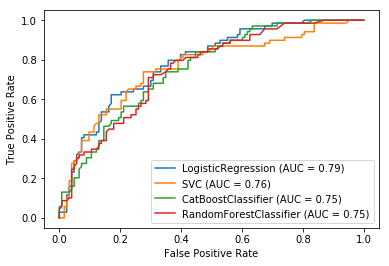

In [131]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(diabetes_LR,X_teste,y_teste)
plot_roc_curve(diabetes_SVM,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(diabetes_cat,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(diabetes_RF,X_teste,y_teste, ax=disp.ax_);